<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Load-Environment" data-toc-modified-id="Load-Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Environment</a></span><ul class="toc-item"><li><span><a href="#Load-raw-data" data-toc-modified-id="Load-raw-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load raw data</a></span></li></ul></li><li><span><a href="#Time-Domain-(The-same-time,-different-axes)" data-toc-modified-id="Time-Domain-(The-same-time,-different-axes)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time Domain (The same time, different axes)</a></span><ul class="toc-item"><li><span><a href="#run-state" data-toc-modified-id="run-state-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>run state</a></span></li><li><span><a href="#run-state-(MA)" data-toc-modified-id="run-state-(MA)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>run state (MA)</a></span></li><li><span><a href="#walk-state" data-toc-modified-id="walk-state-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>walk state</a></span></li><li><span><a href="#walk-state-(MA)" data-toc-modified-id="walk-state-(MA)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>walk state (MA)</a></span></li></ul></li><li><span><a href="#Frequency-Domain" data-toc-modified-id="Frequency-Domain-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Frequency Domain</a></span><ul class="toc-item"><li><span><a href="#run-state" data-toc-modified-id="run-state-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>run state</a></span></li><li><span><a href="#run-state-(MA)" data-toc-modified-id="run-state-(MA)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>run state (MA)</a></span></li><li><span><a href="#walk-state" data-toc-modified-id="walk-state-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>walk state</a></span></li><li><span><a href="#walk-state-(MA)" data-toc-modified-id="walk-state-(MA)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>walk state (MA)</a></span></li></ul></li><li><span><a href="#RMS" data-toc-modified-id="RMS-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>RMS</a></span><ul class="toc-item"><li><span><a href="#run-state" data-toc-modified-id="run-state-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>run state</a></span></li><li><span><a href="#walk-state" data-toc-modified-id="walk-state-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>walk state</a></span></li></ul></li></ul></div>

1. time series data (x, y, z), do moving average with window size 3 for each x, y, z
2. calculate $RMS = \sqrt{x^2+y^2+z^2}$.
3. Do 128 point FFT and normalize.


- peak of FFT in run state >= 1.7 HZ
- peak of FFT in walk state <= 1.6 HZ

However, this is still inaccurate...

# Load Environment

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal, interpolate, fftpack

DIRECTORY_PATH = 'wearable-motion-sensors/'
RUN_TOTAL_SAMPLE = 6
WALK_TOTAL_SAMPLE = 7
MA_WINDOW = 3
COLORS = ['blue', 'red', 'green', 'purple', 'gold', 'brown']
TAGS = ['x', 'y', 'z']

## Load raw data

In [2]:
run_df = []
for i in range(RUN_TOTAL_SAMPLE):
    run_df.append(pd.read_csv(DIRECTORY_PATH + 'run' + str(i + 1) + '.csv', header=None))
    run_df[i].columns = ['x', 'y', 'z', 'timestamp']
    run_df[i]['x'] = run_df[i]['x'] + 200

In [3]:
walk_df = []
for i in range(WALK_TOTAL_SAMPLE):
    walk_df.append(pd.read_csv(DIRECTORY_PATH + 'walk' + str(i + 1) + '.csv', header=None))
    walk_df[i].columns = ['x', 'y', 'z', 'timestamp']
    walk_df[i]['x'] = walk_df[i]['x'] + 200

# Time Domain (The same time, different axes)

## run state

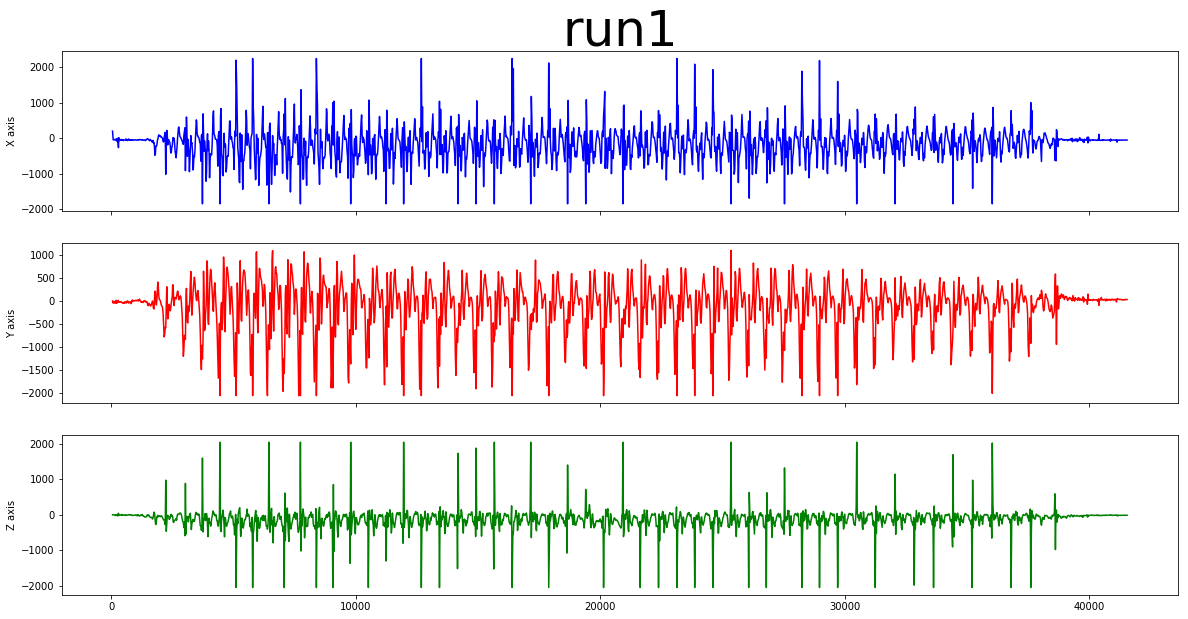

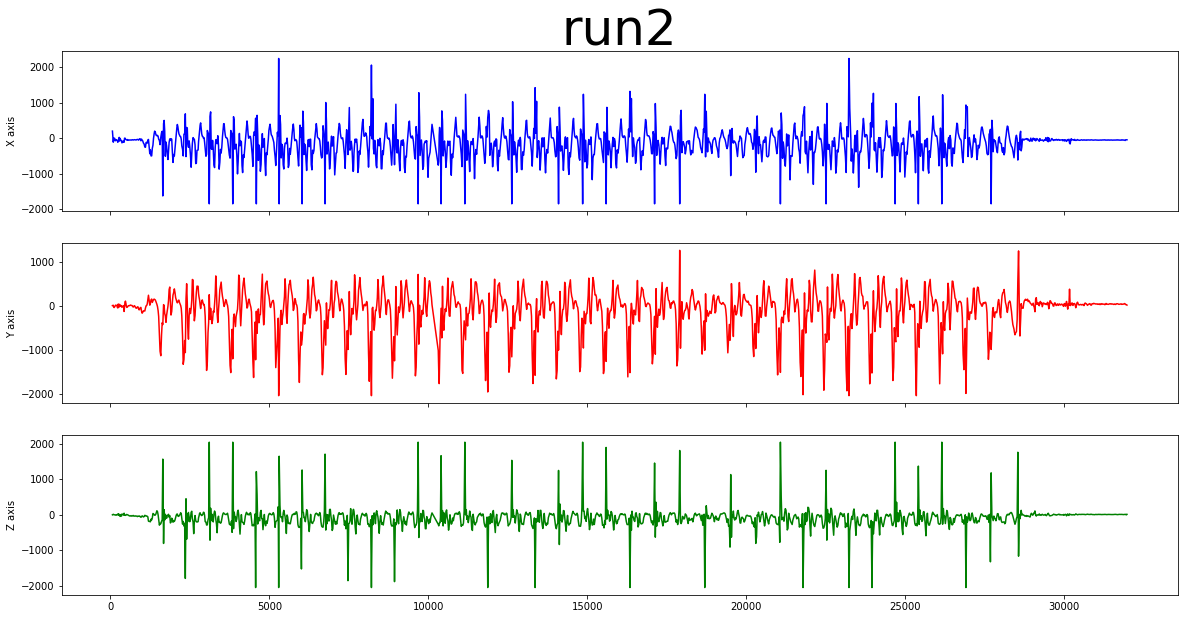

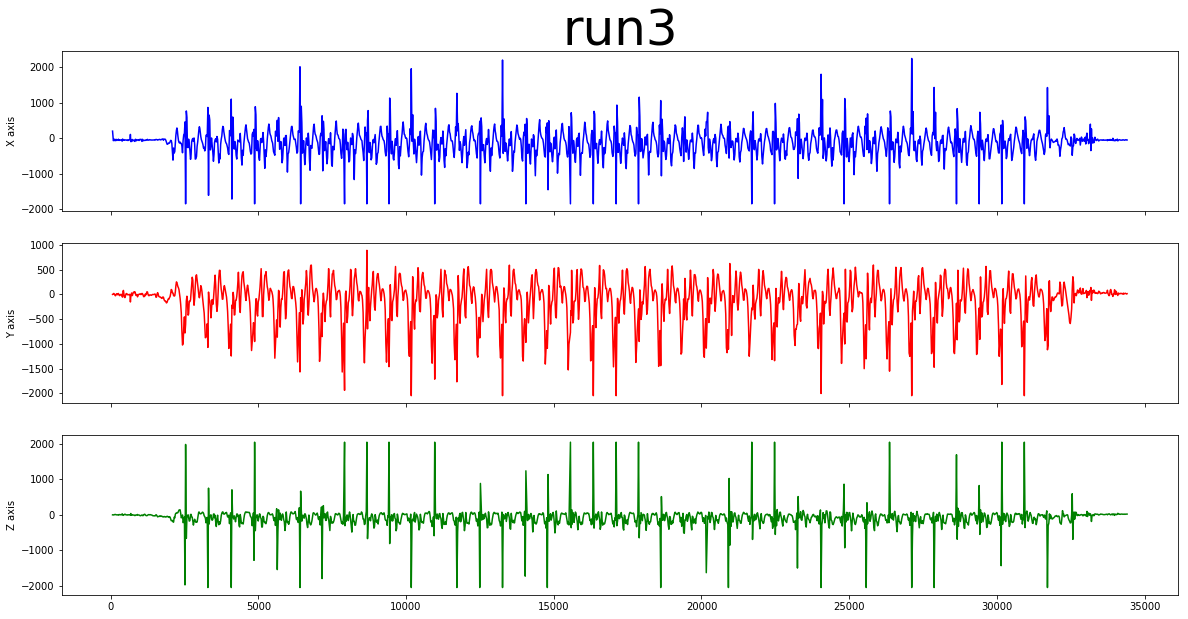

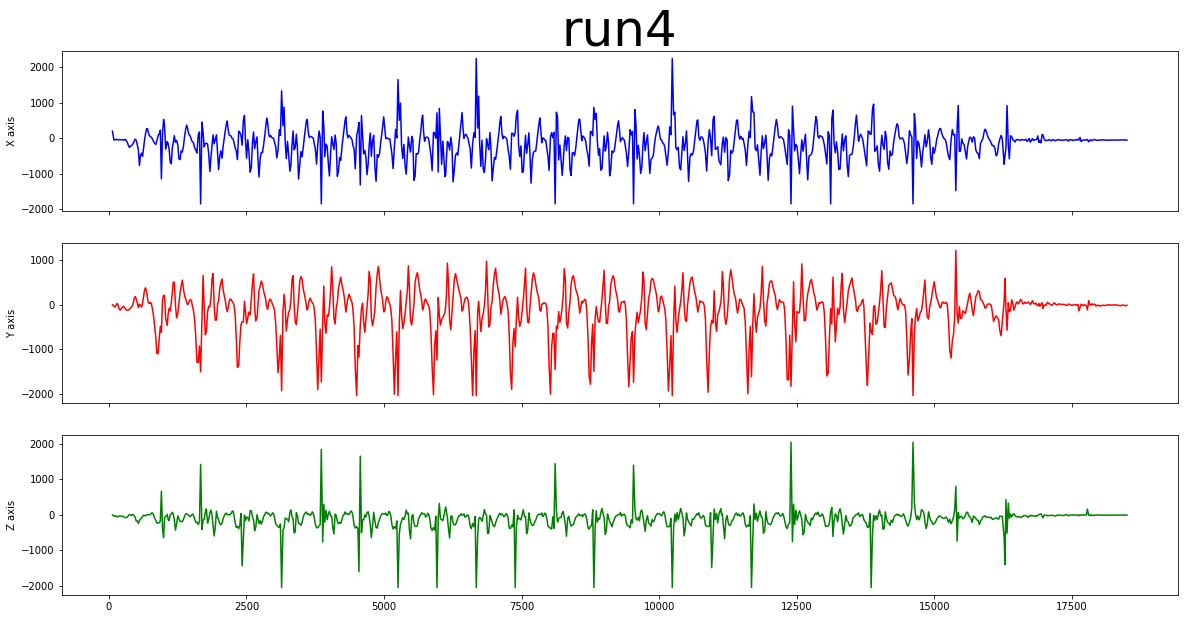

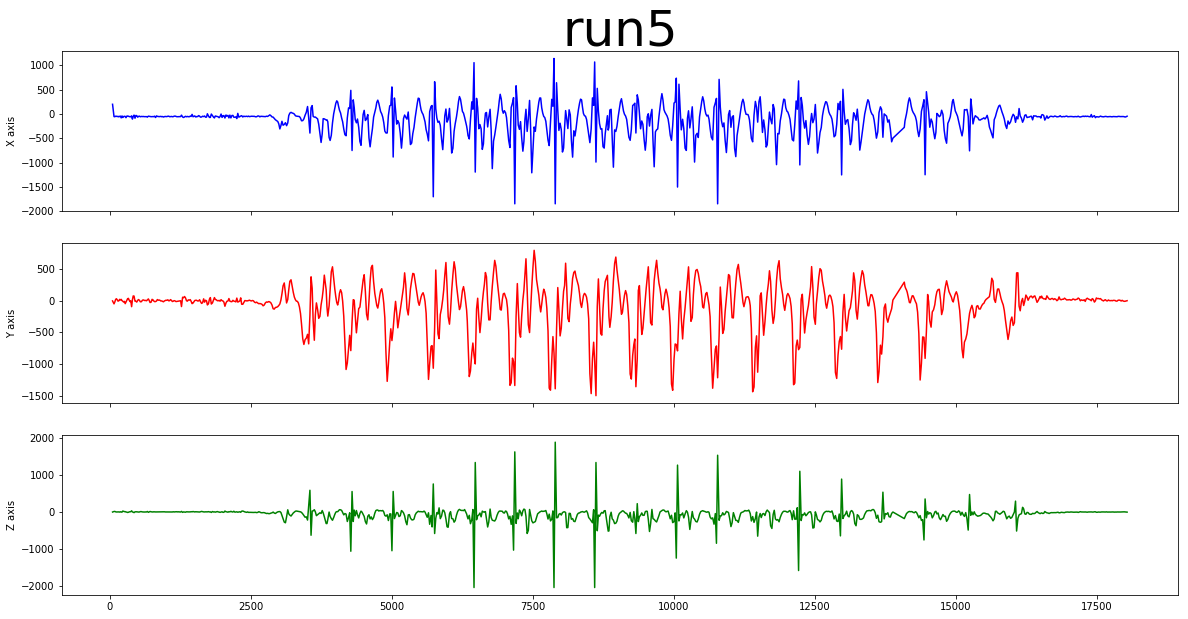

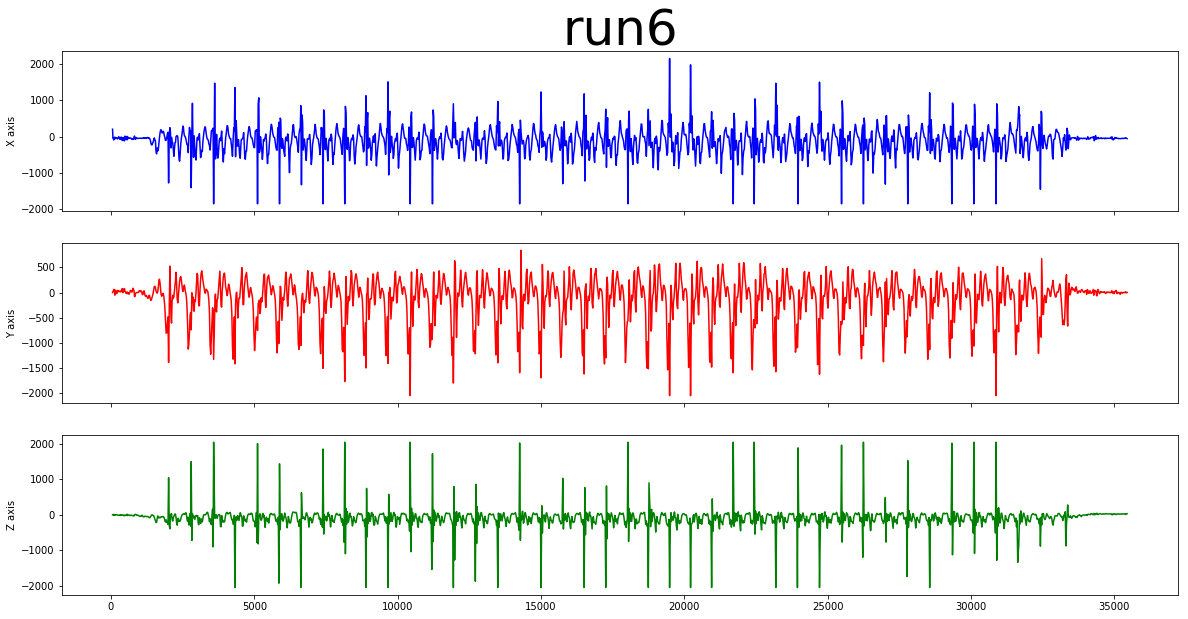

In [4]:
for i in range(RUN_TOTAL_SAMPLE):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    for j in range(3):
        ax[j].plot(run_df[i]['timestamp'], run_df[i][TAGS[j]], color=COLORS[j])
        axis_name = TAGS[j].upper() + ' axis'
        ax[j].set_ylabel(axis_name)
        
    ax[0].set_title('run' + str(i + 1), fontsize=50)

plt.show()

## run state (MA)

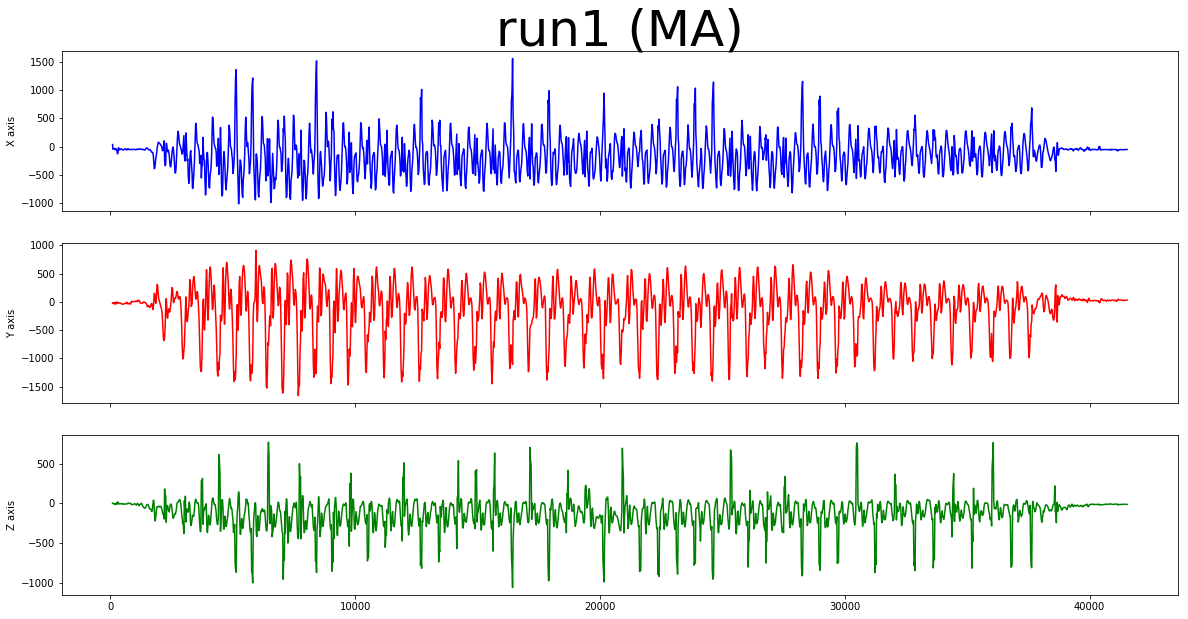

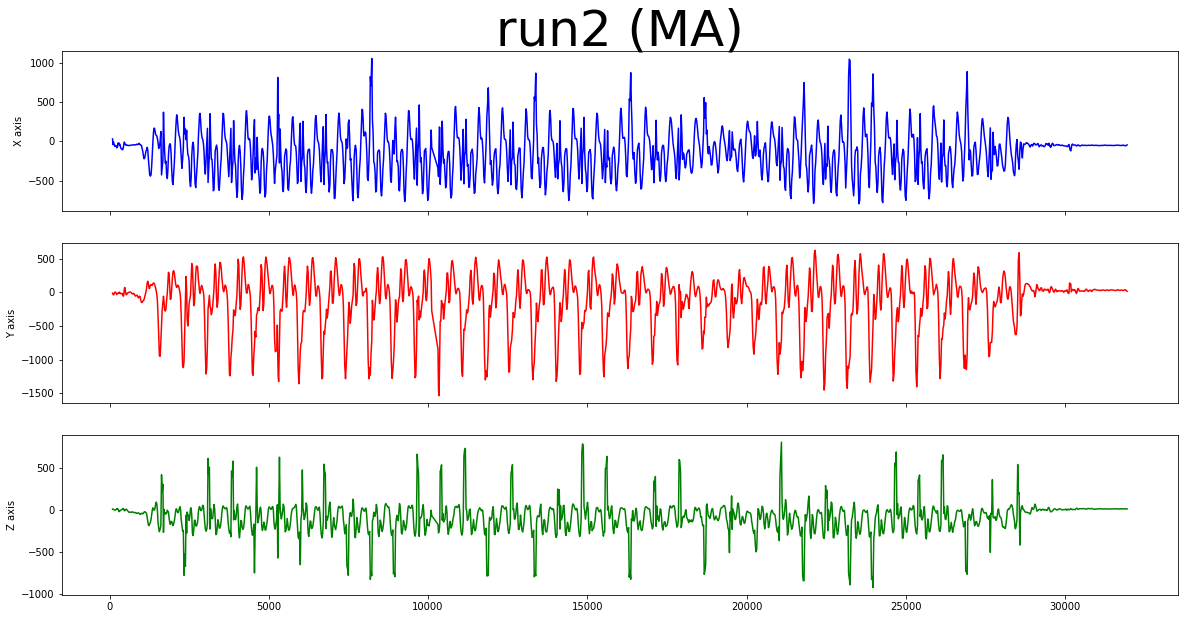

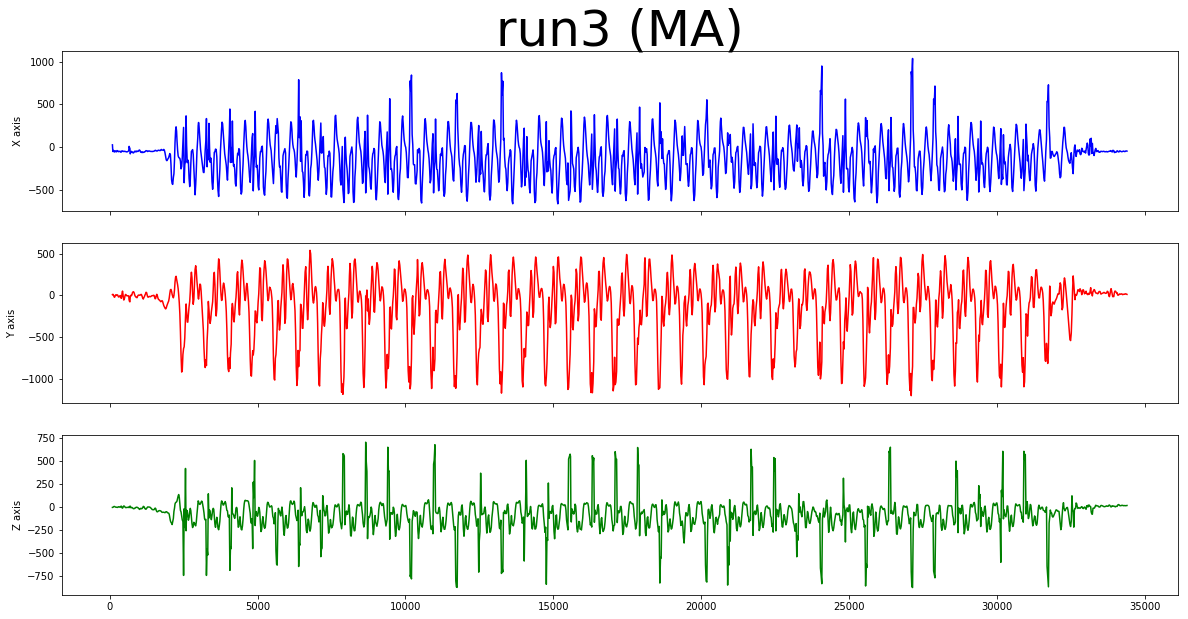

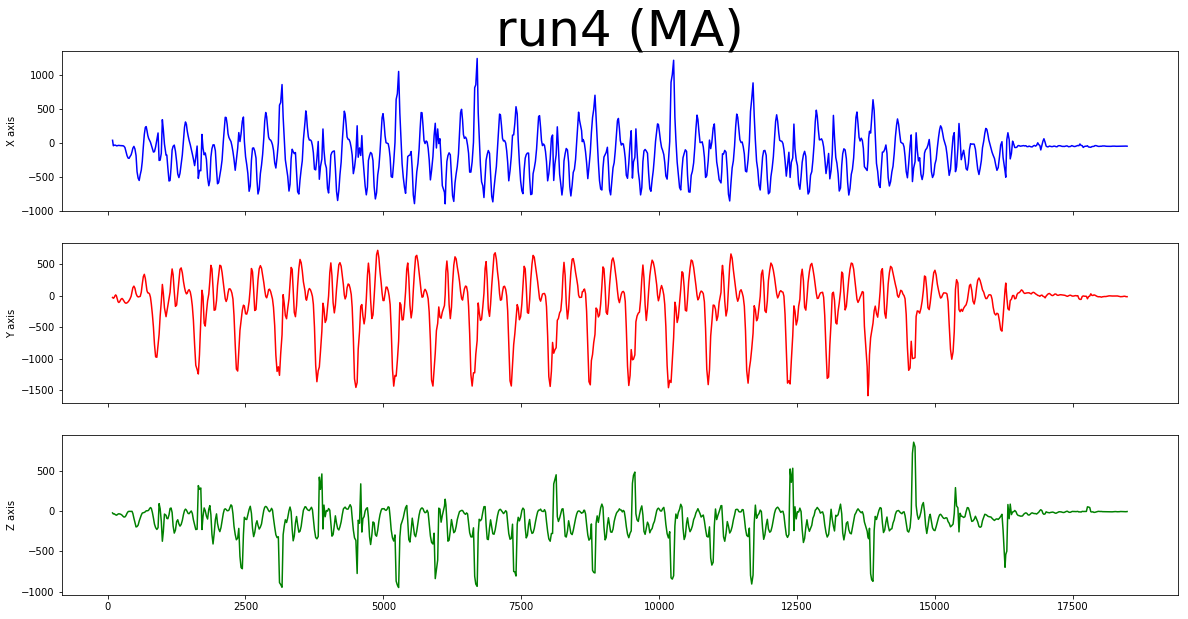

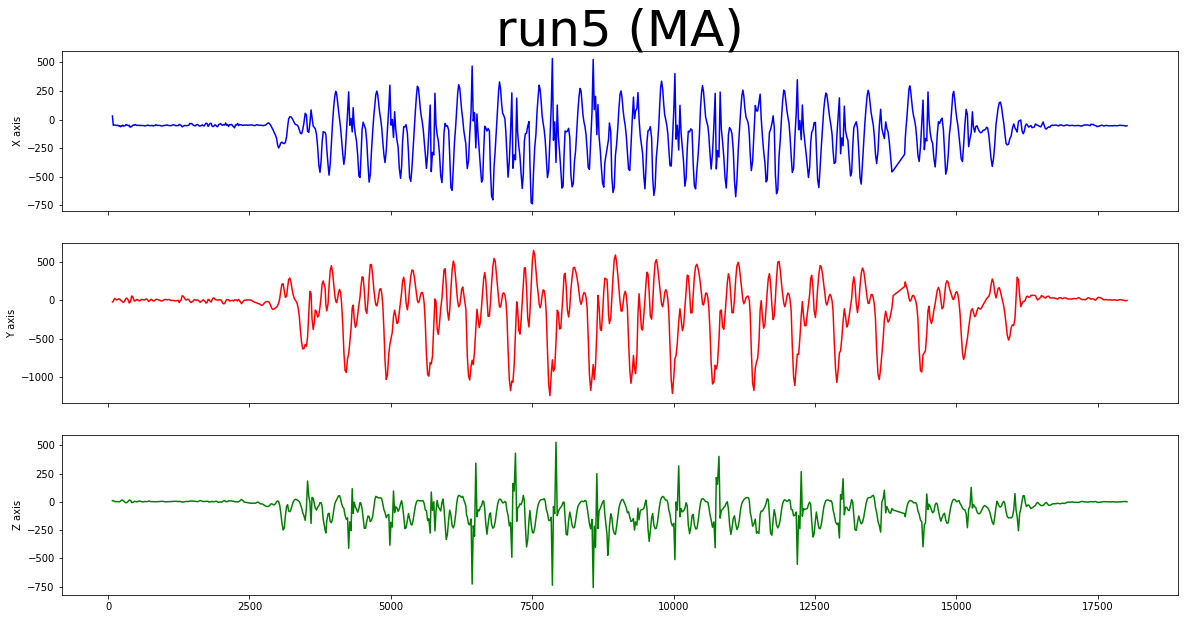

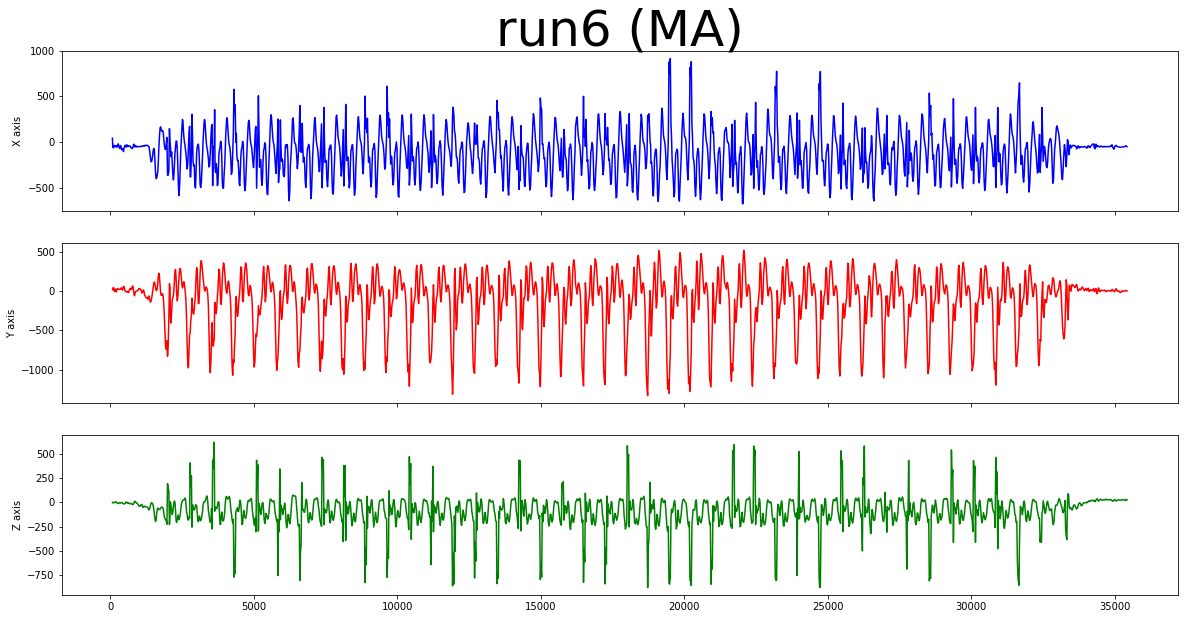

In [5]:
for i in range(RUN_TOTAL_SAMPLE):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    for j in range(3):
        df = run_df[i][TAGS[j]].rolling(window=MA_WINDOW, center=True).mean()
        ax[j].plot(run_df[i]['timestamp'], df, color=COLORS[j])
        
        axis_name = TAGS[j].upper() + ' axis'
        ax[j].set_ylabel(axis_name)
        
    ax[0].set_title('run' + str(i + 1) + ' (MA)', fontsize=50)

plt.show()

## walk state

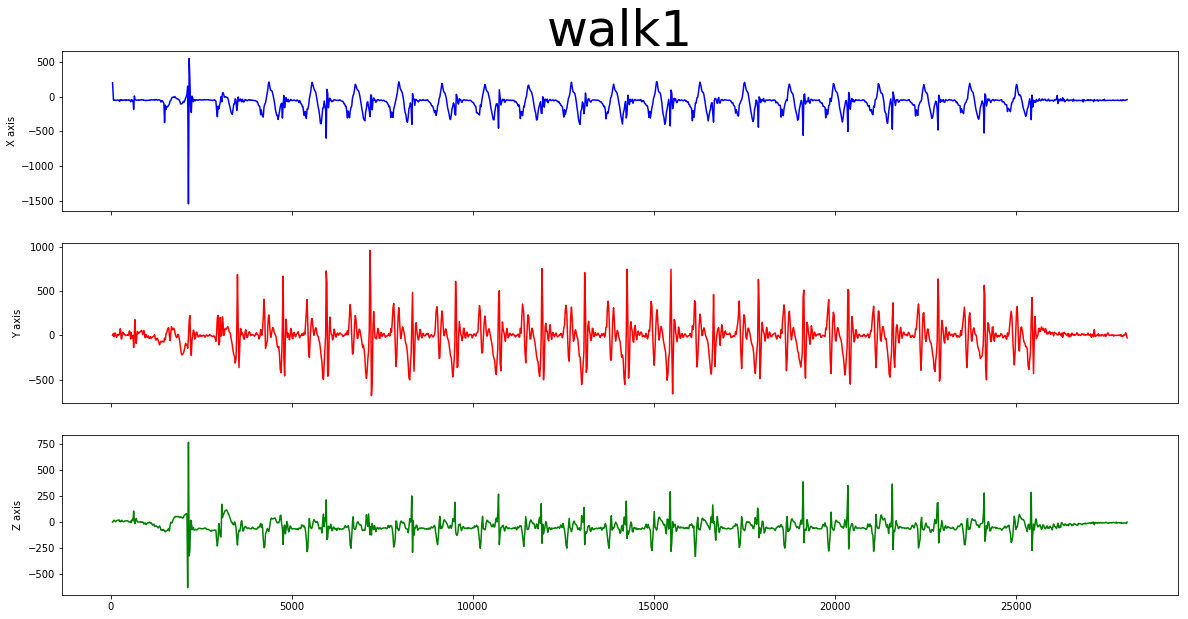

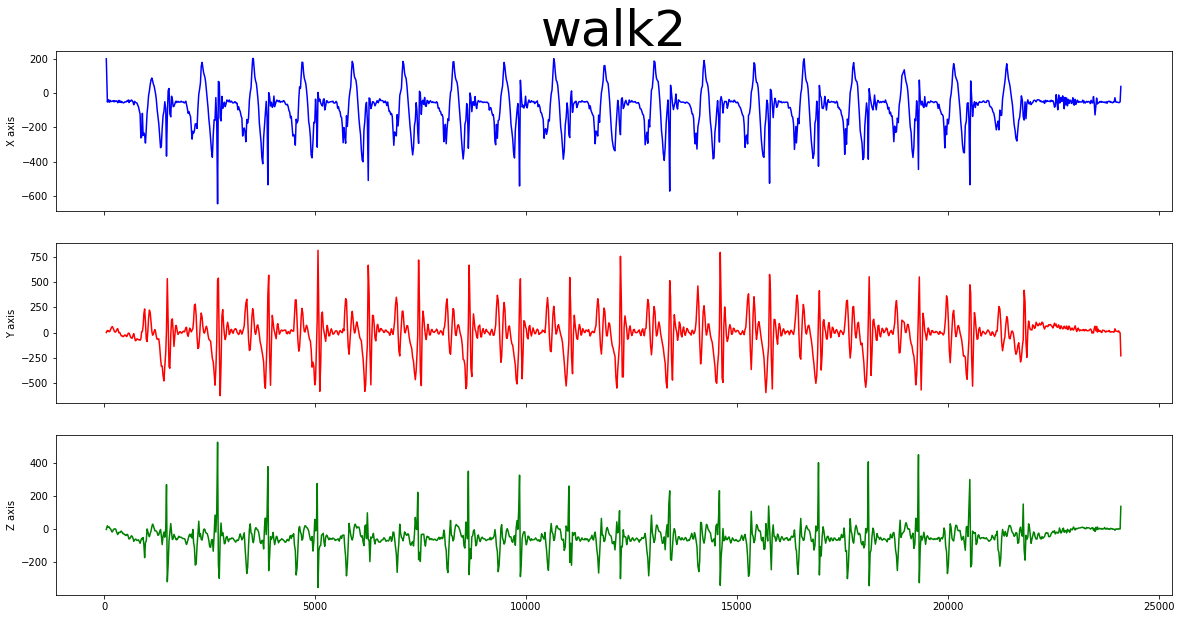

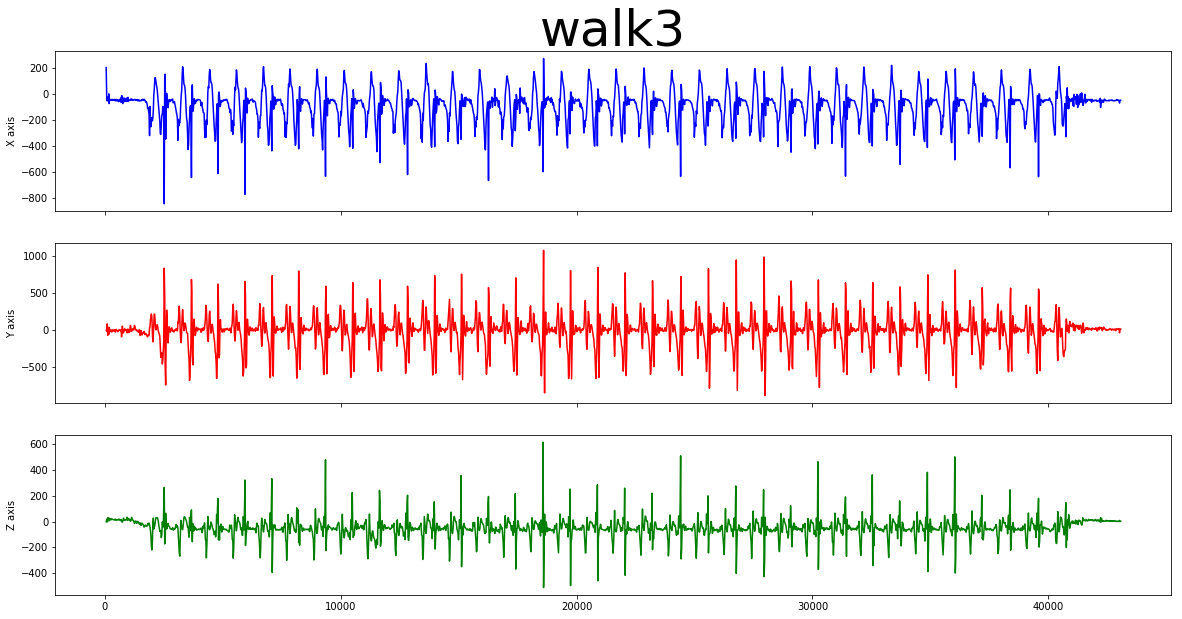

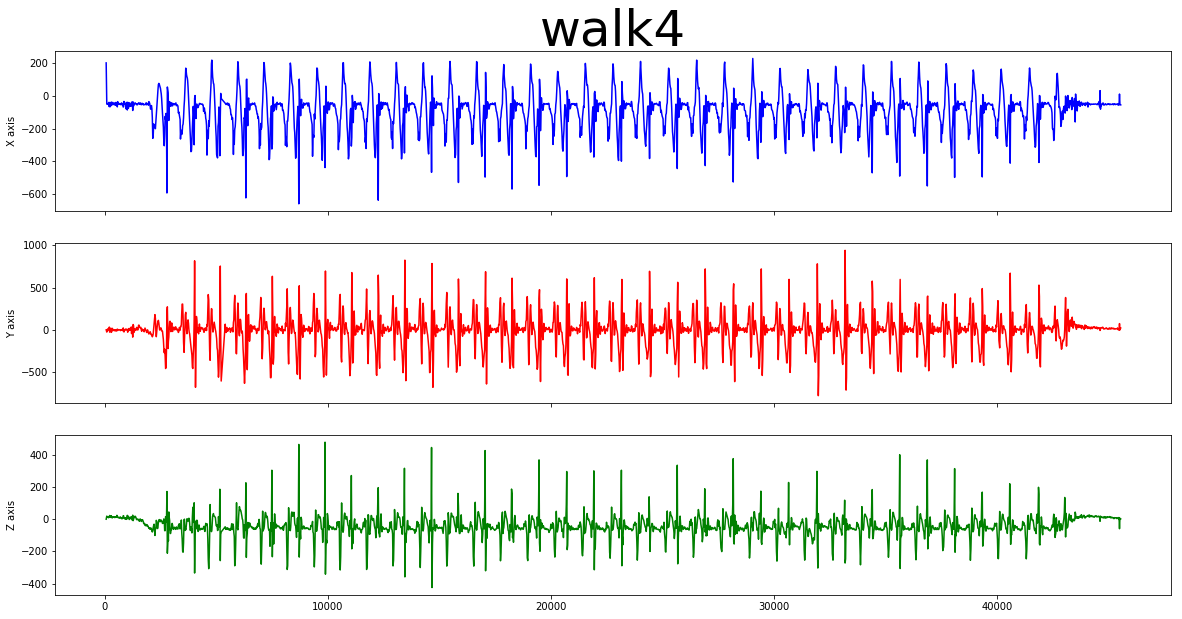

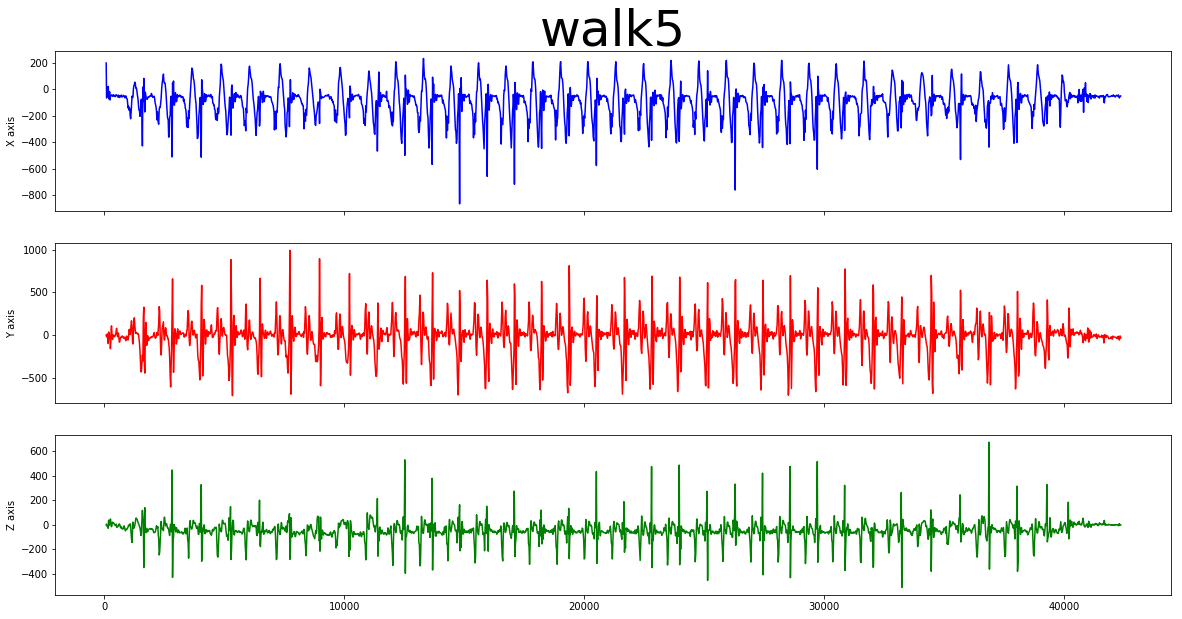

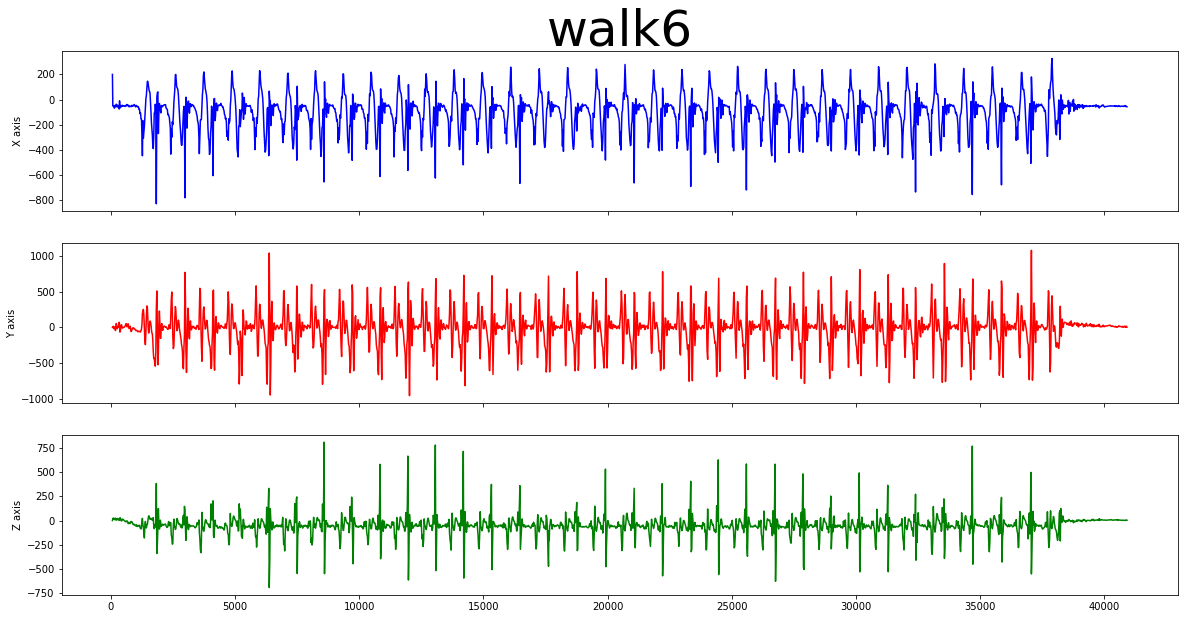

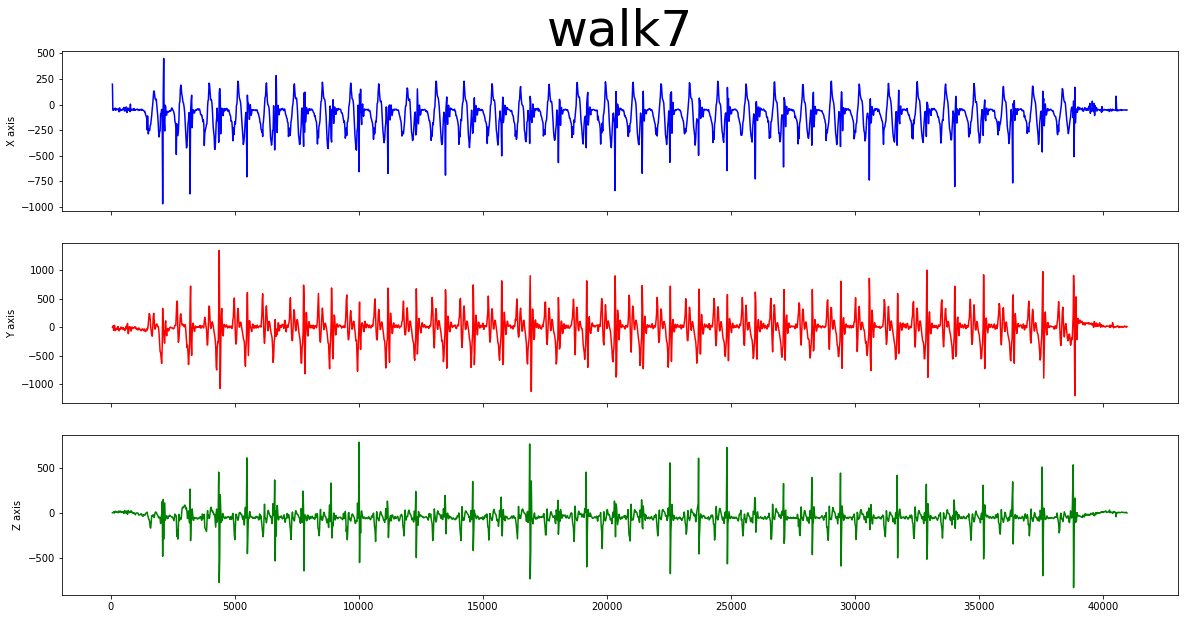

In [6]:
for i in range(WALK_TOTAL_SAMPLE):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    for j in range(3):
        ax[j].plot(walk_df[i]['timestamp'], walk_df[i][TAGS[j]], color=COLORS[j])
        axis_name = TAGS[j].upper() + ' axis'
        ax[j].set_ylabel(axis_name)
        
    ax[0].set_title('walk' + str(i + 1), fontsize=50)

plt.show()

## walk state (MA)

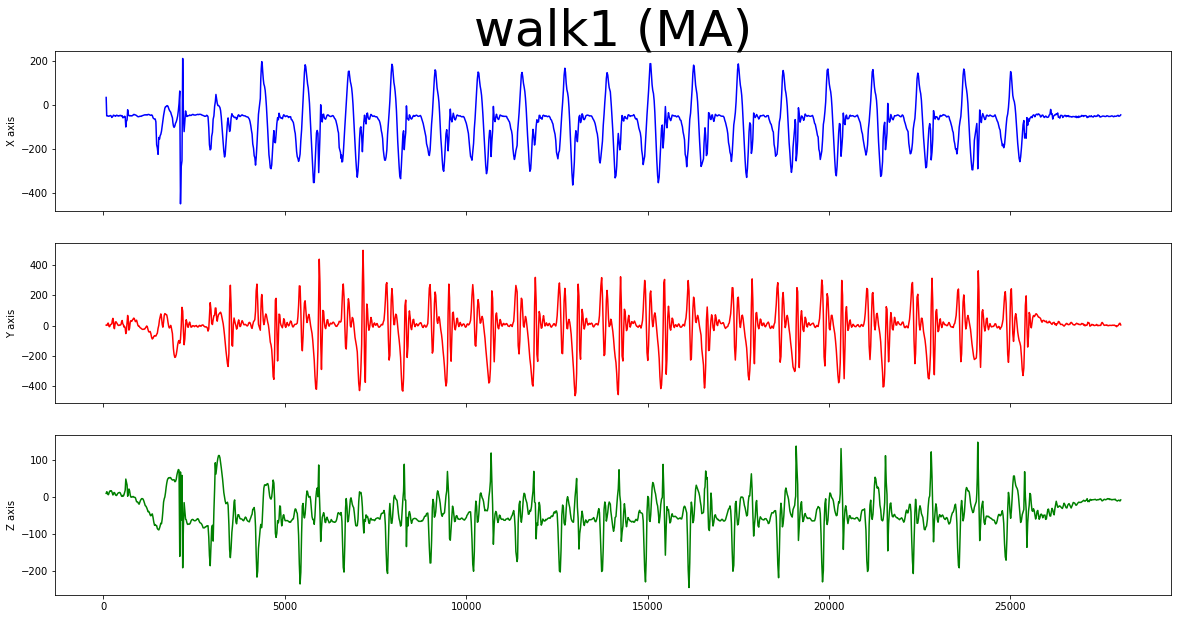

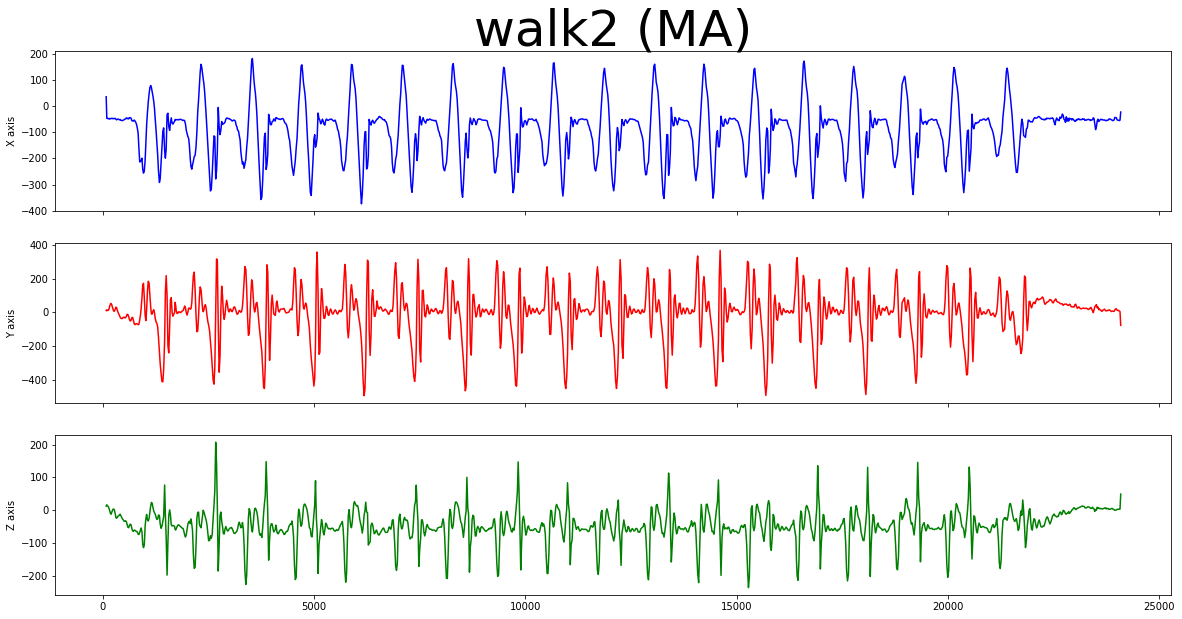

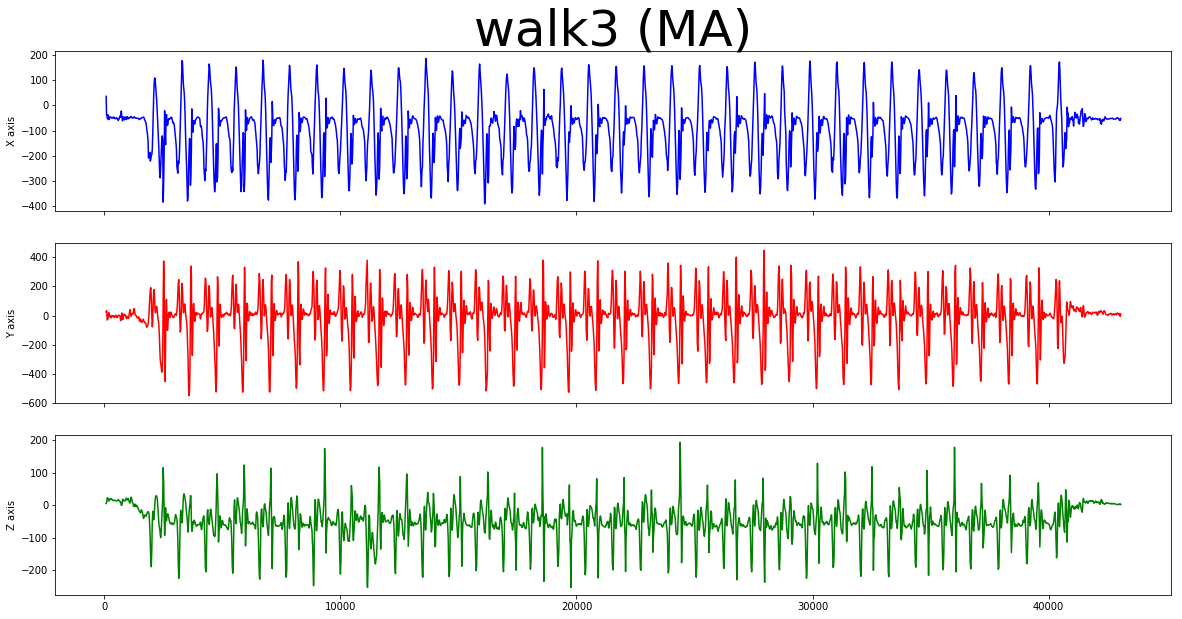

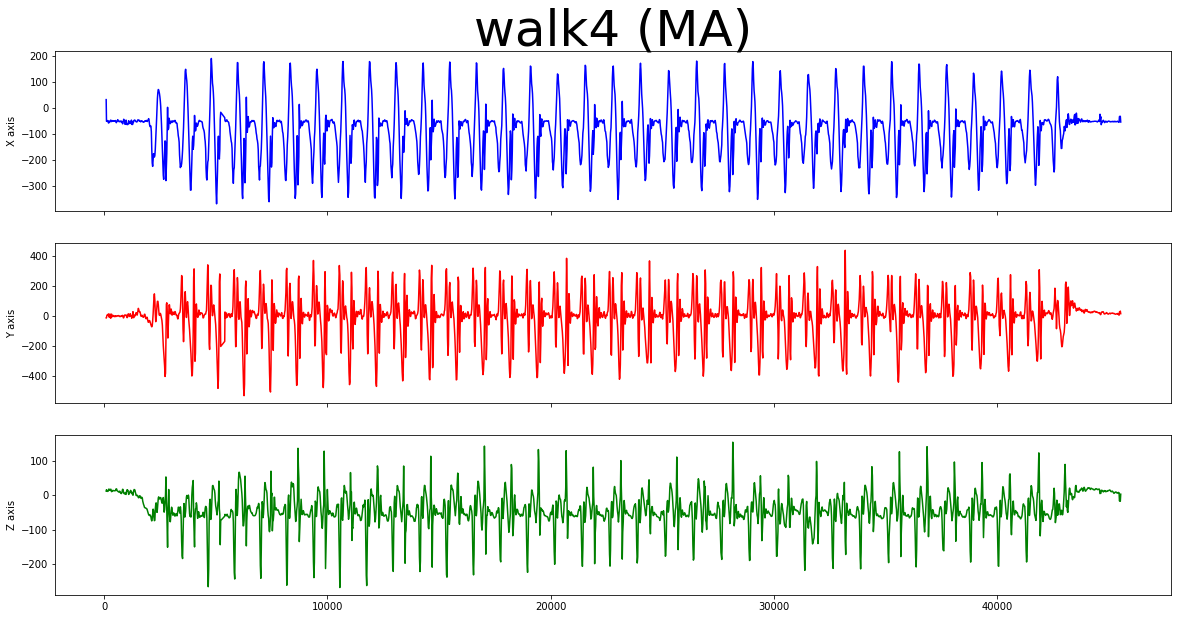

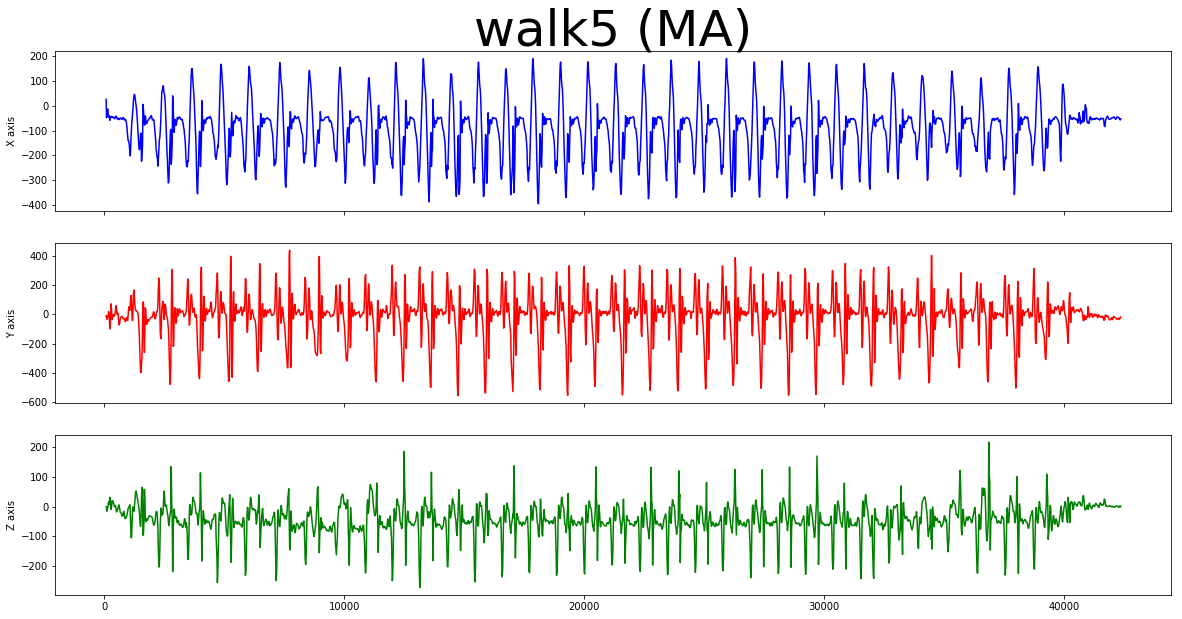

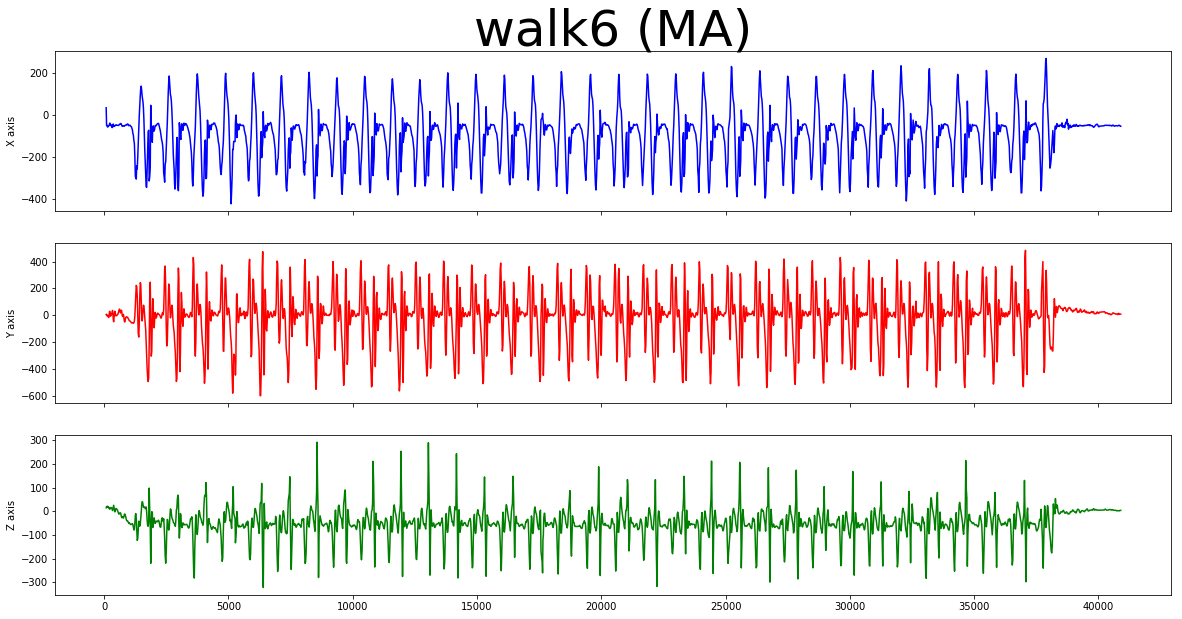

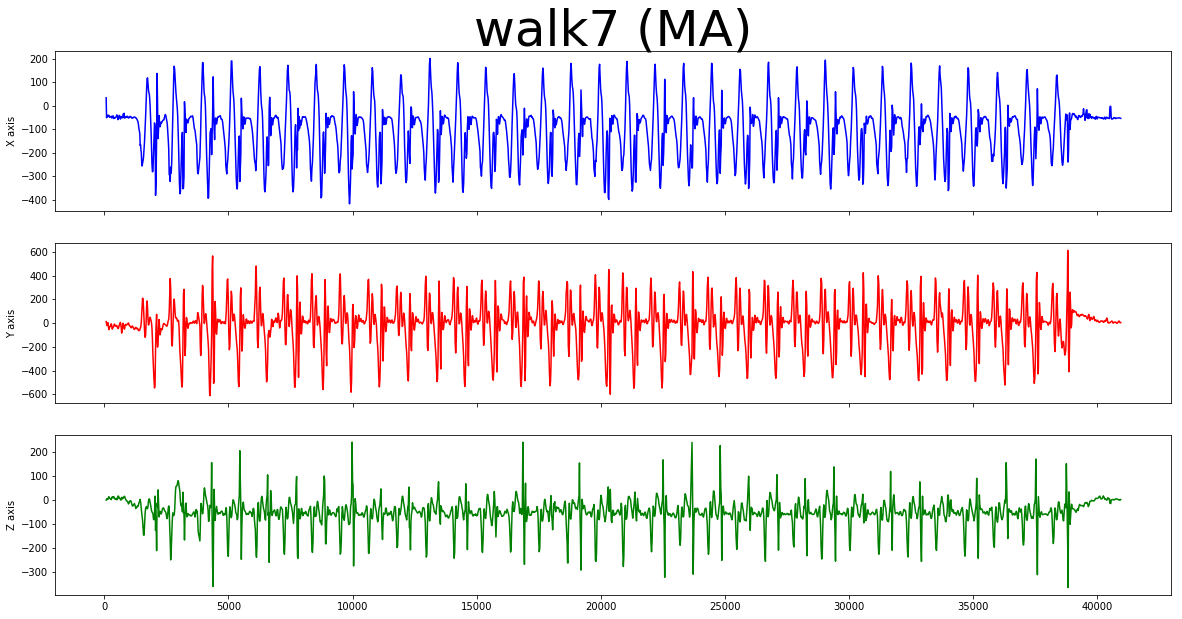

In [7]:
for i in range(WALK_TOTAL_SAMPLE):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    for j in range(3):
        df = walk_df[i][TAGS[j]].rolling(window=MA_WINDOW, center=True).mean()
        ax[j].plot(walk_df[i]['timestamp'], df, color=COLORS[j])
        axis_name = TAGS[j].upper() + ' axis'
        ax[j].set_ylabel(axis_name)
        
    ax[0].set_title('walk' + str(i + 1) + ' (MA)', fontsize=50)

plt.show()

# Frequency Domain

In [8]:
def FFT(xs):
    n = 2 ** 7

    fs = 1 / 2
    ps = 1 / fs

    spectrum = fftpack.fft(xs)
    spectrum_ss = 2 / n * np.abs(spectrum[0:n // 2])

    freq = np.linspace(0, fs / 2, int(n // 2))
    
    fft_df = pd.DataFrame(data={
        'freq': freq,
        'spectrum': spectrum_ss
    })
    return fft_df

## run state

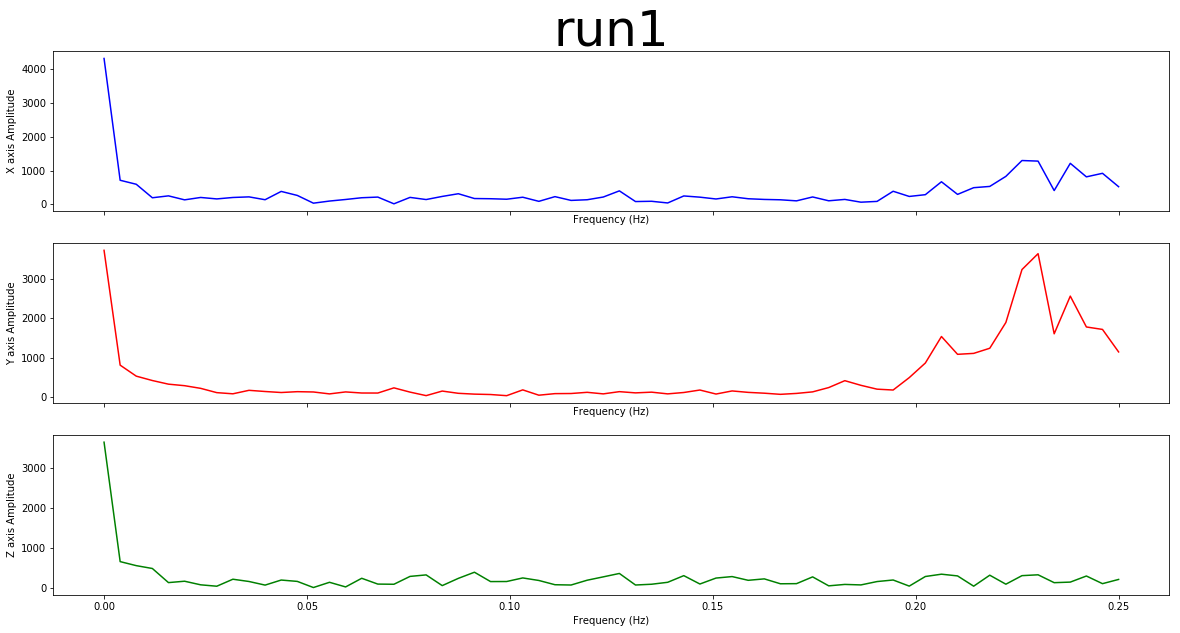

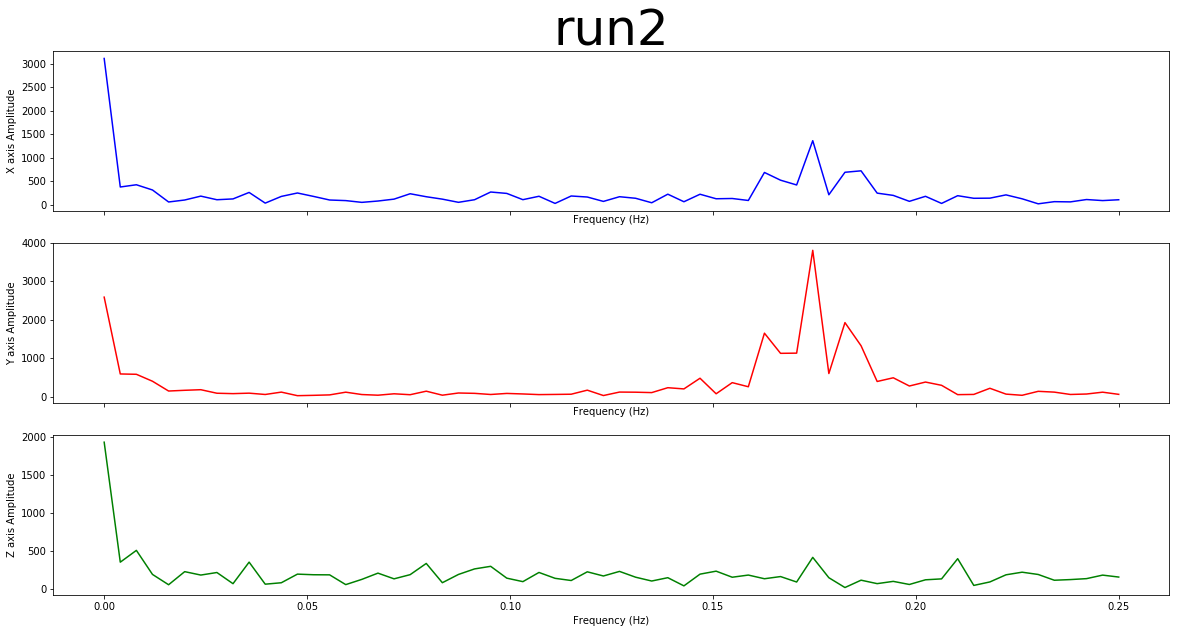

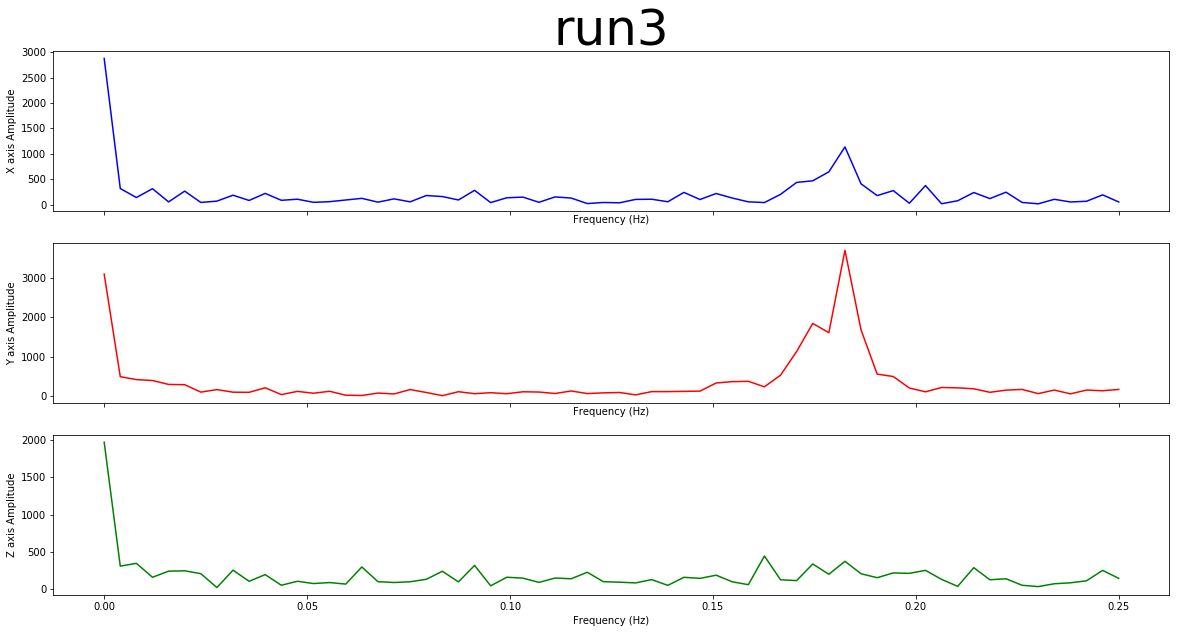

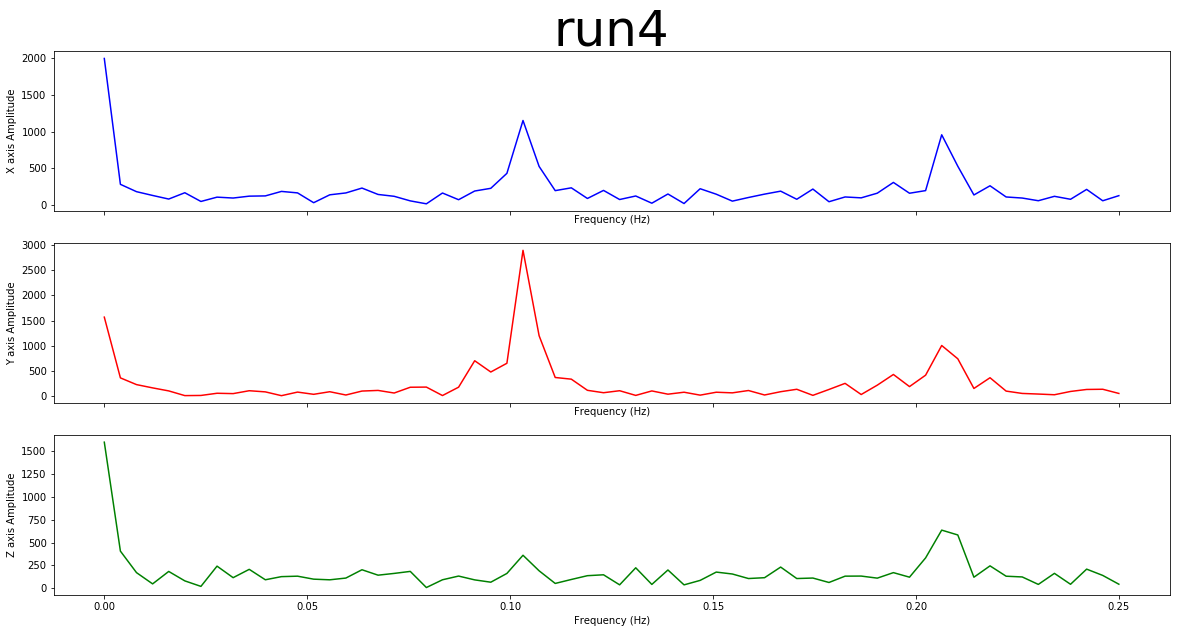

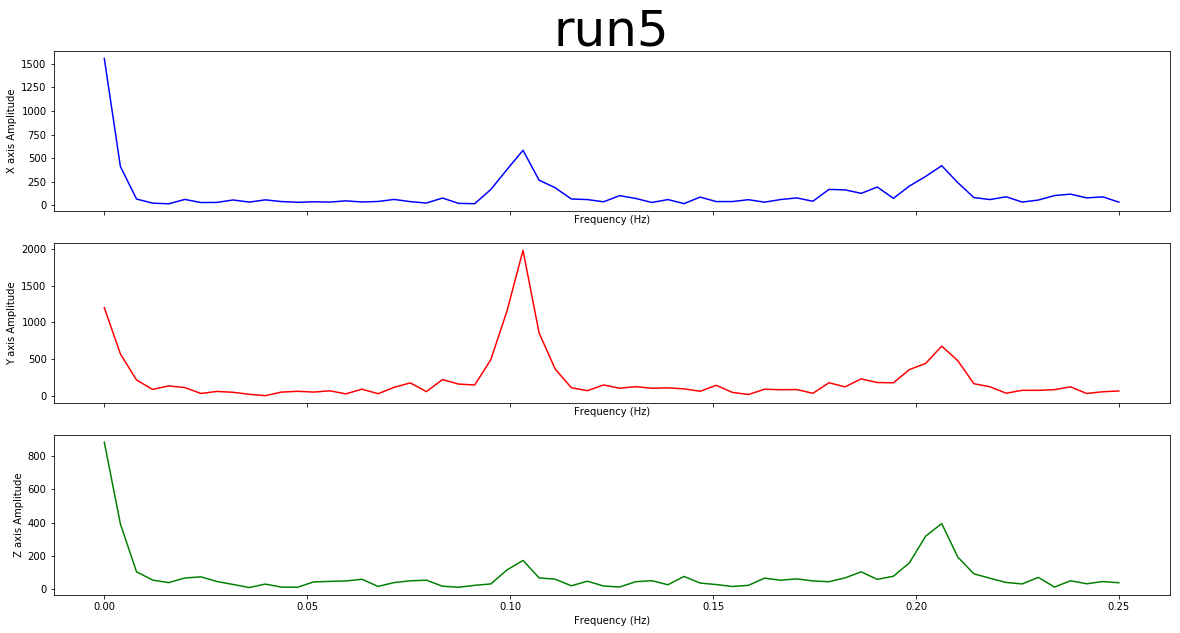

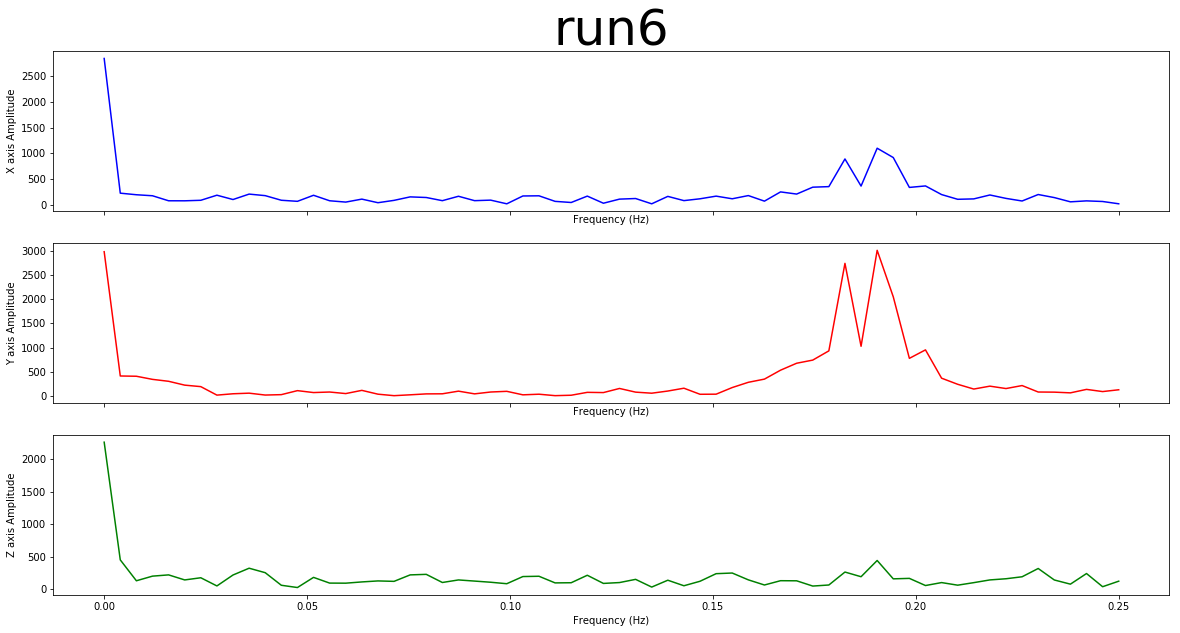

In [9]:
for i in range(RUN_TOTAL_SAMPLE):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    for j in range(3):
        fft_df = FFT(run_df[i][TAGS[j]])
        ax[j].plot(fft_df['freq'], fft_df['spectrum'], color=COLORS[j])
        axis_name = TAGS[j].upper() + ' axis'
        ax[j].set_ylabel(axis_name + ' Amplitude')
        ax[j].set_xlabel('Frequency (Hz)')
        
    ax[0].set_title('run' + str(i + 1), fontsize=50)
plt.show()

## run state (MA)

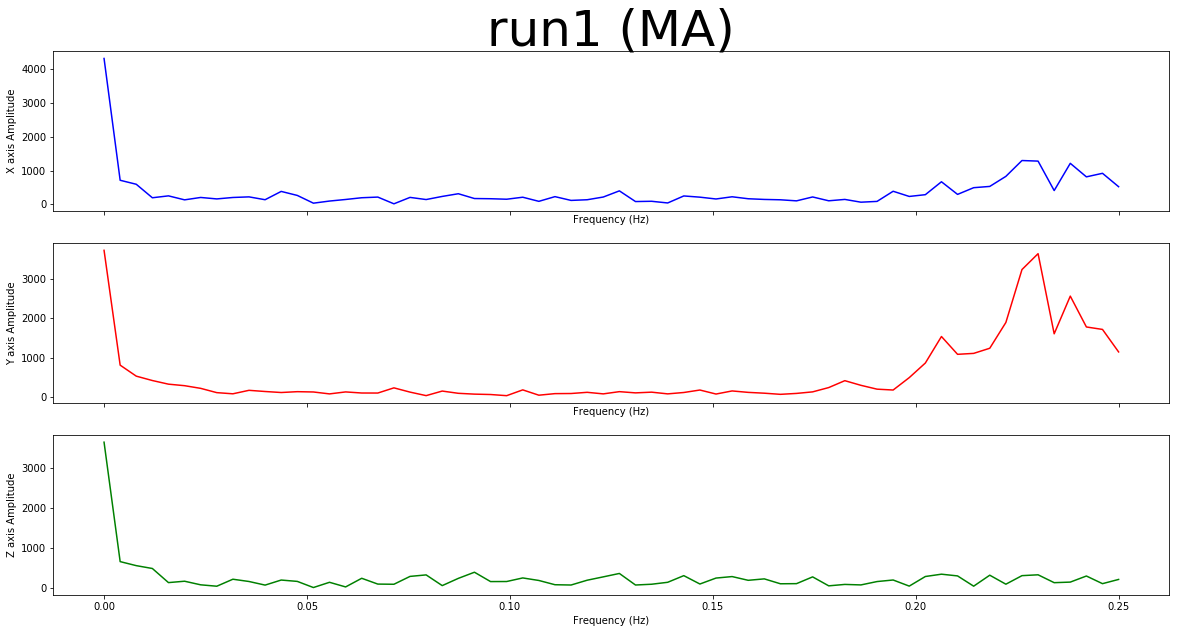

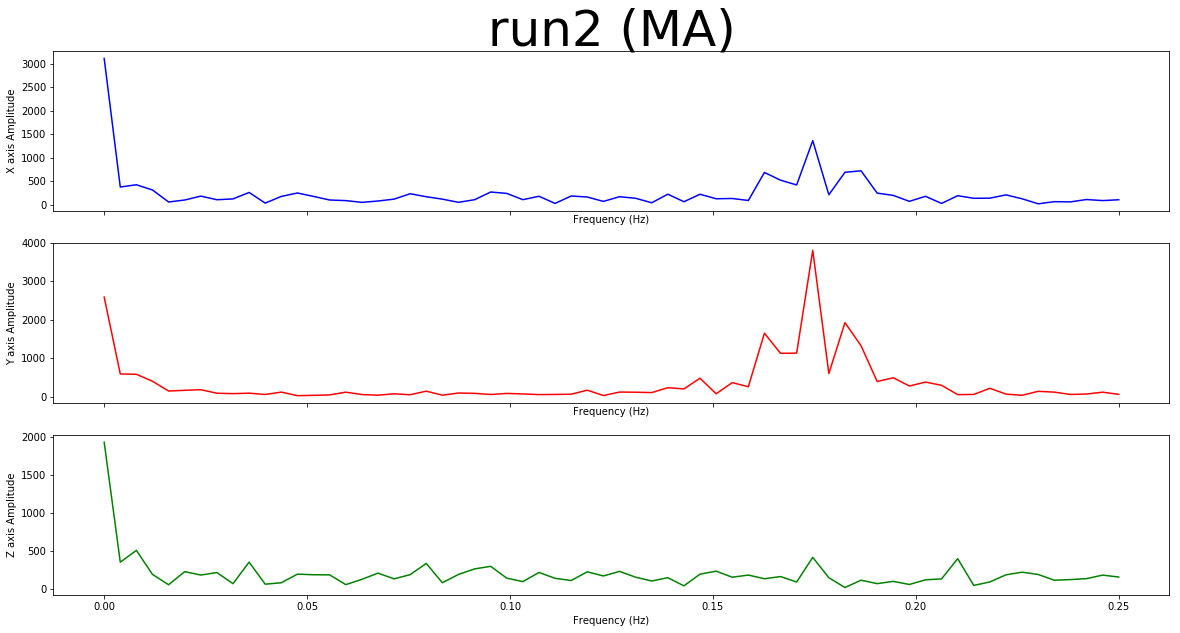

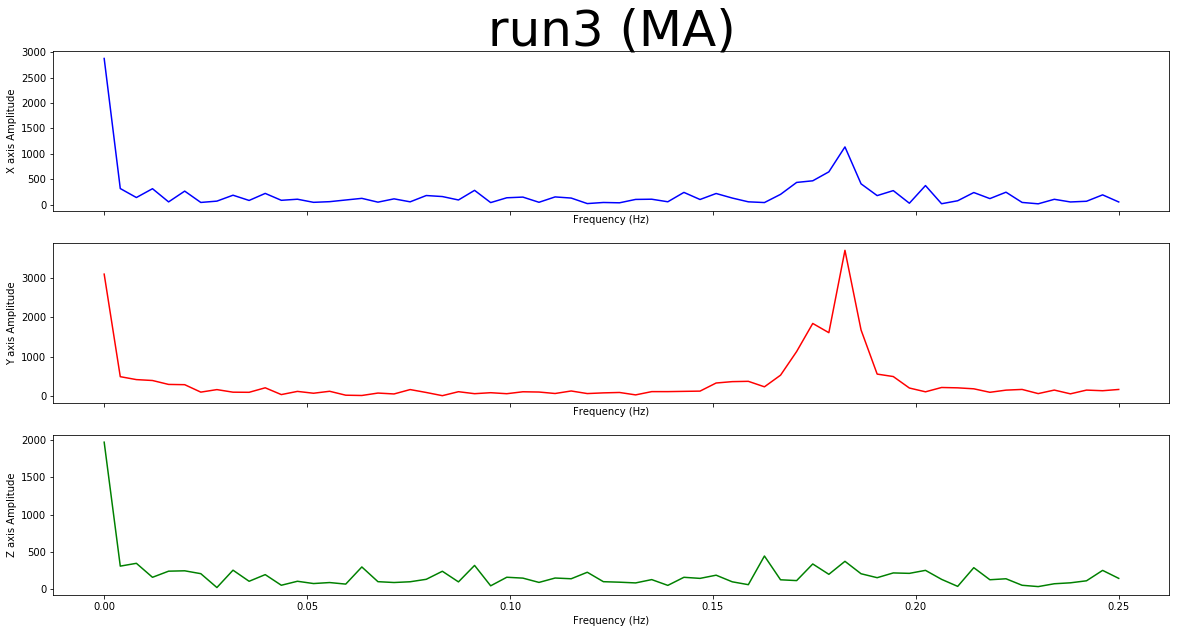

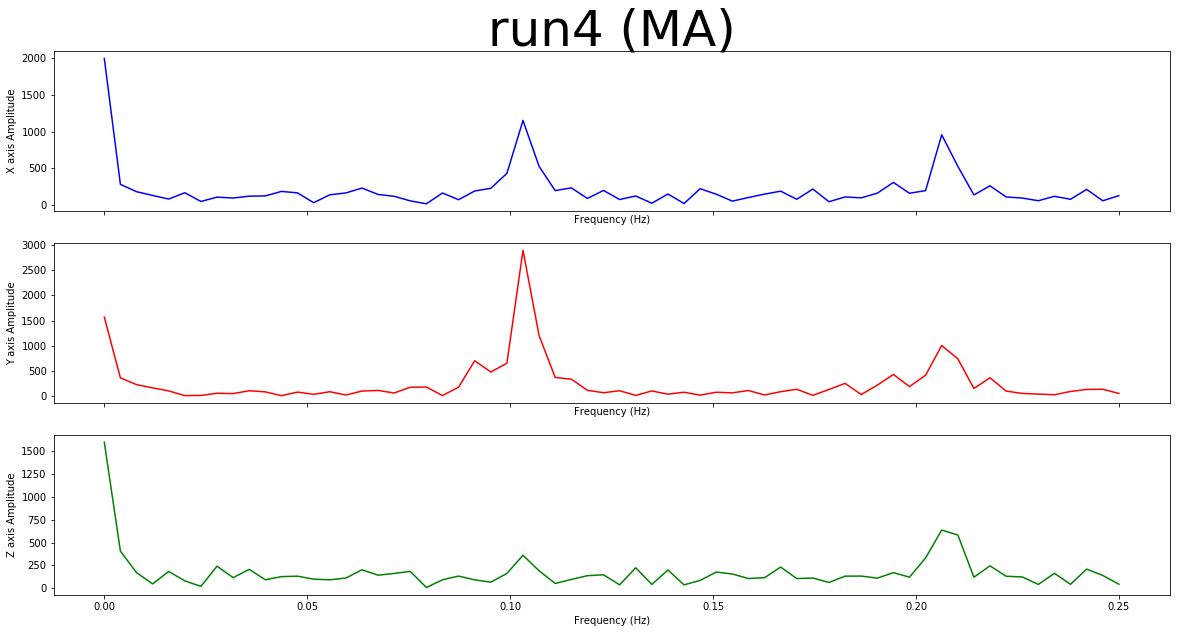

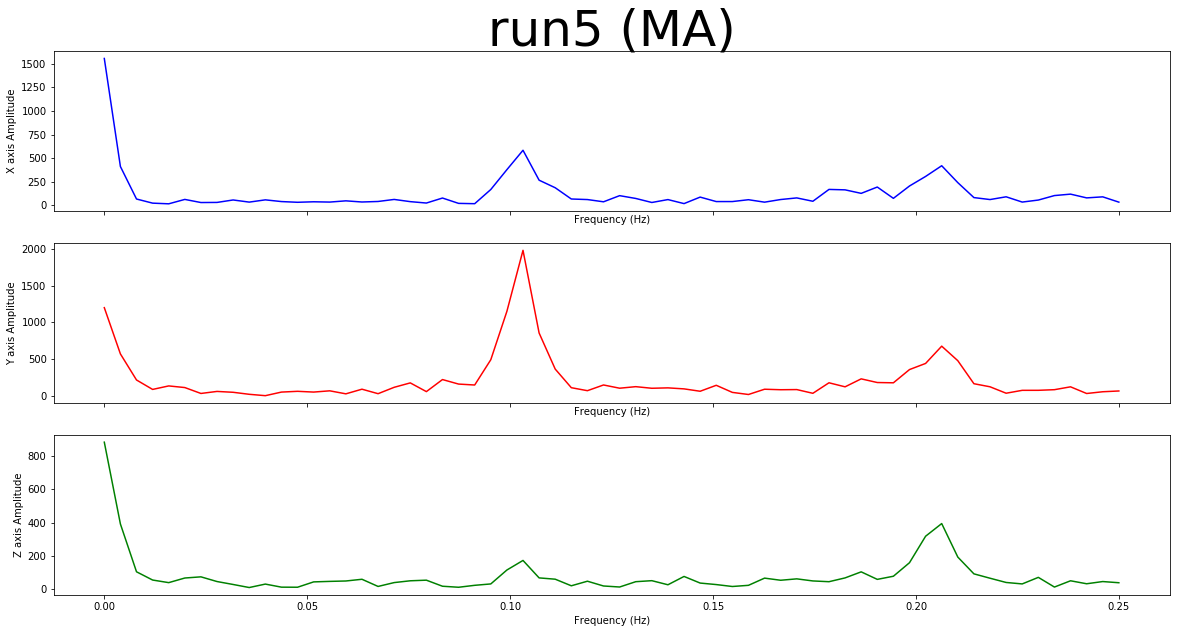

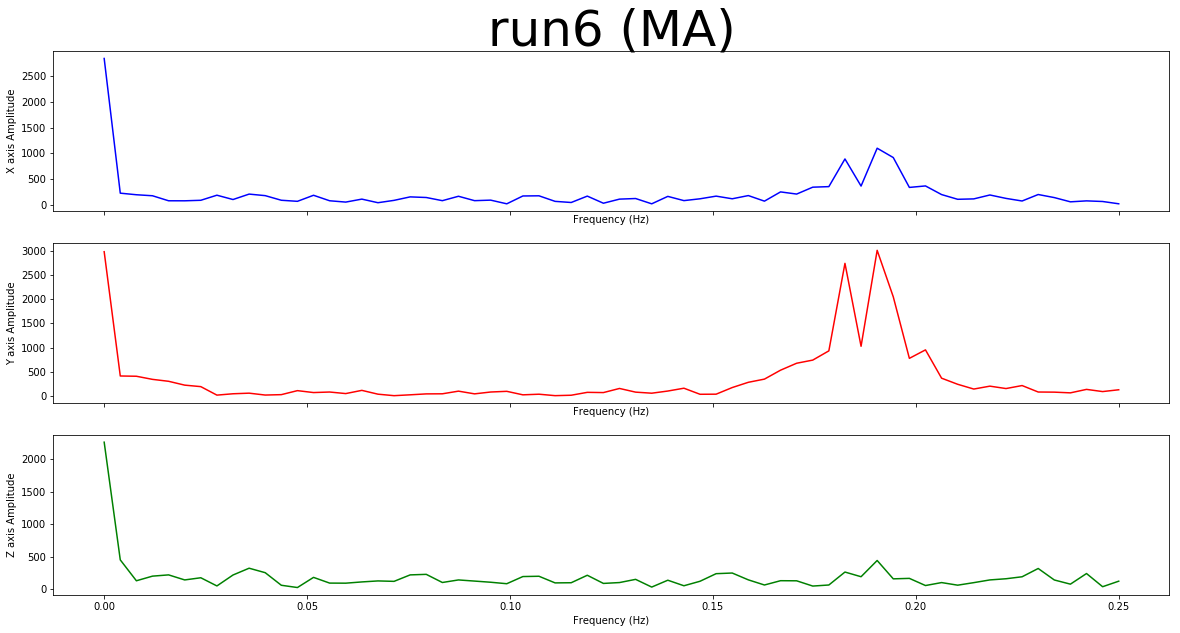

In [10]:
for i in range(RUN_TOTAL_SAMPLE):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    for j in range(3):
        df = run_df[i][TAGS[j]].rolling(window=MA_WINDOW, center=True).mean()
        df.dropna(inplace=True)
        fft_df = FFT(run_df[i][TAGS[j]])
        ax[j].plot(fft_df['freq'], fft_df['spectrum'], color=COLORS[j])
        axis_name = TAGS[j].upper() + ' axis'
        ax[j].set_ylabel(axis_name + ' Amplitude')
        ax[j].set_xlabel('Frequency (Hz)')
        
    ax[0].set_title('run' + str(i + 1) + ' (MA)', fontsize=50)
plt.show()

## walk state

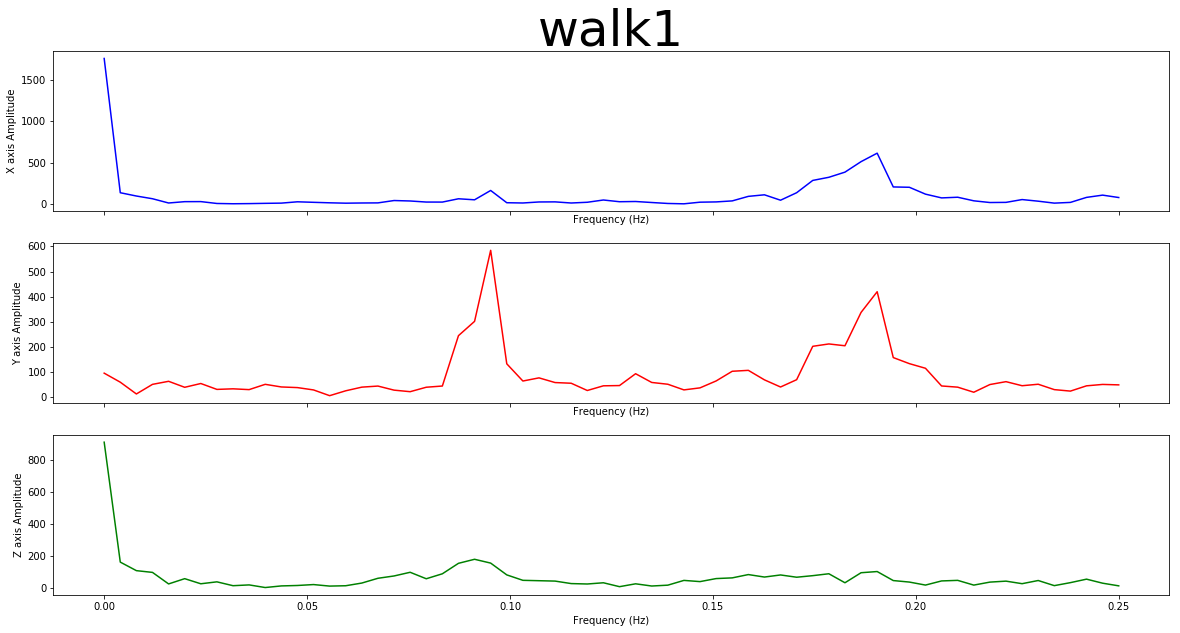

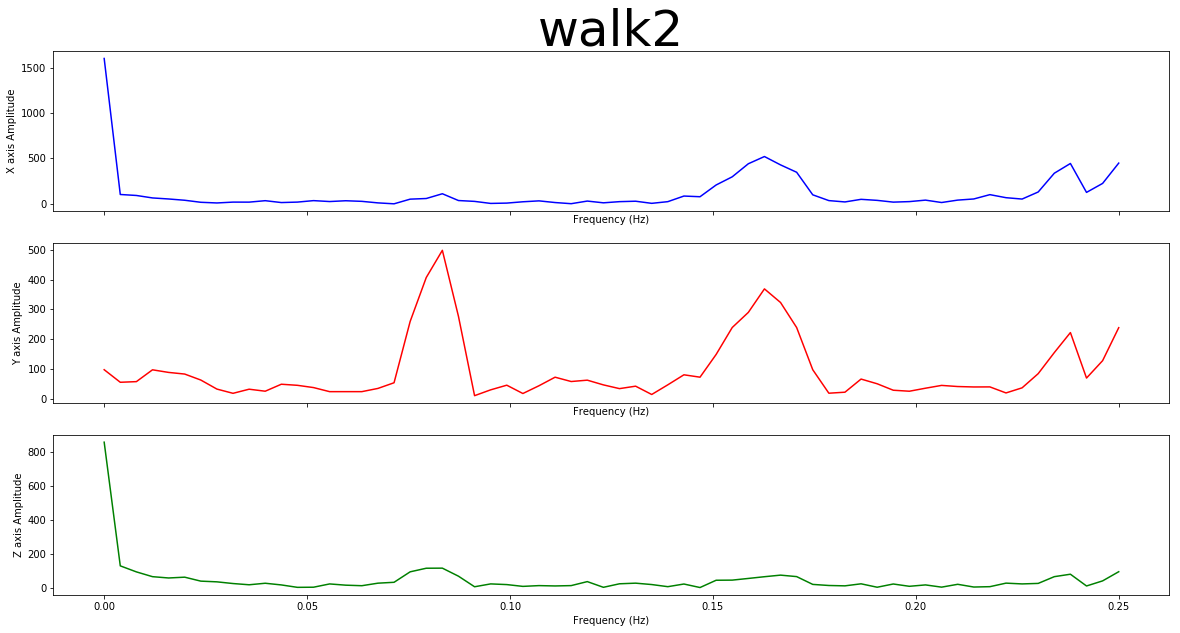

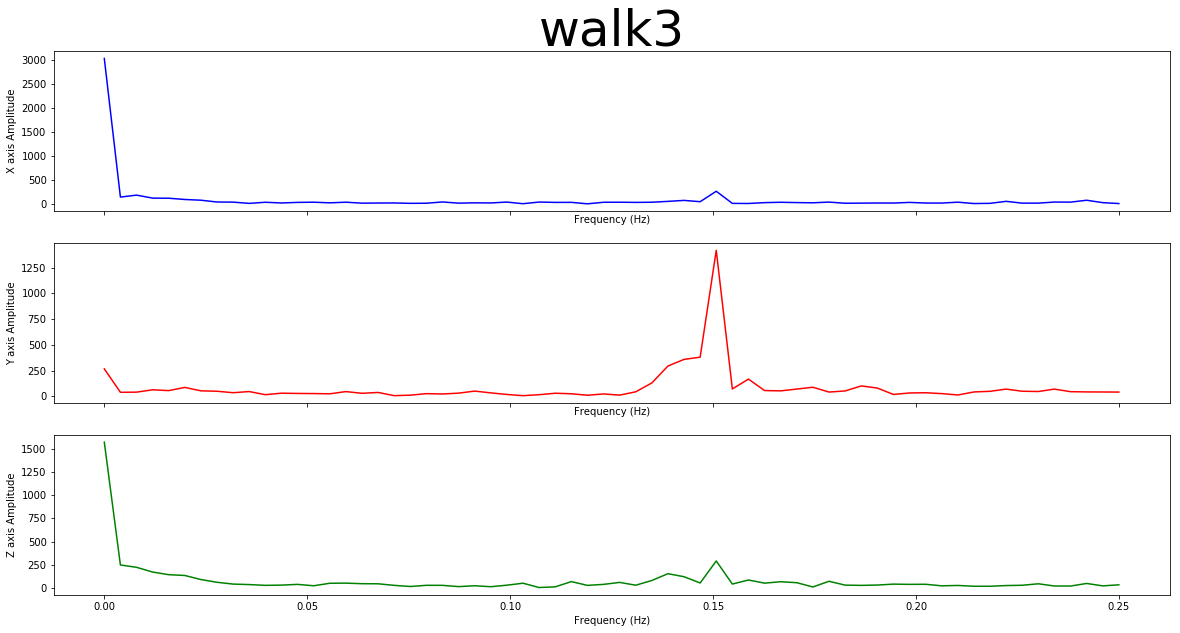

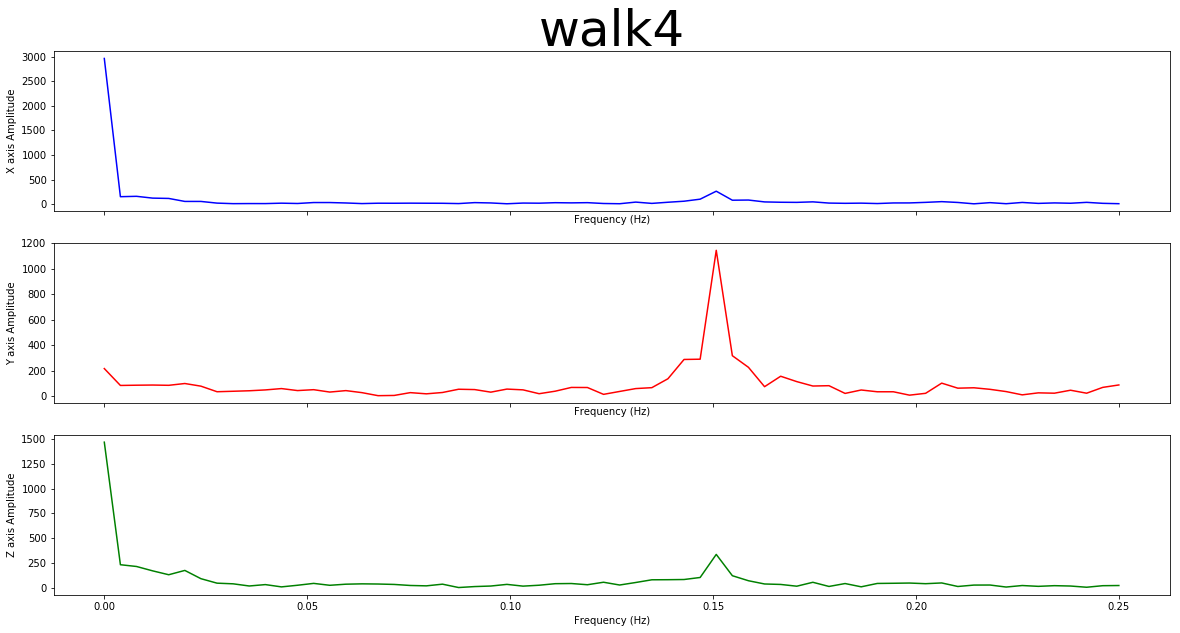

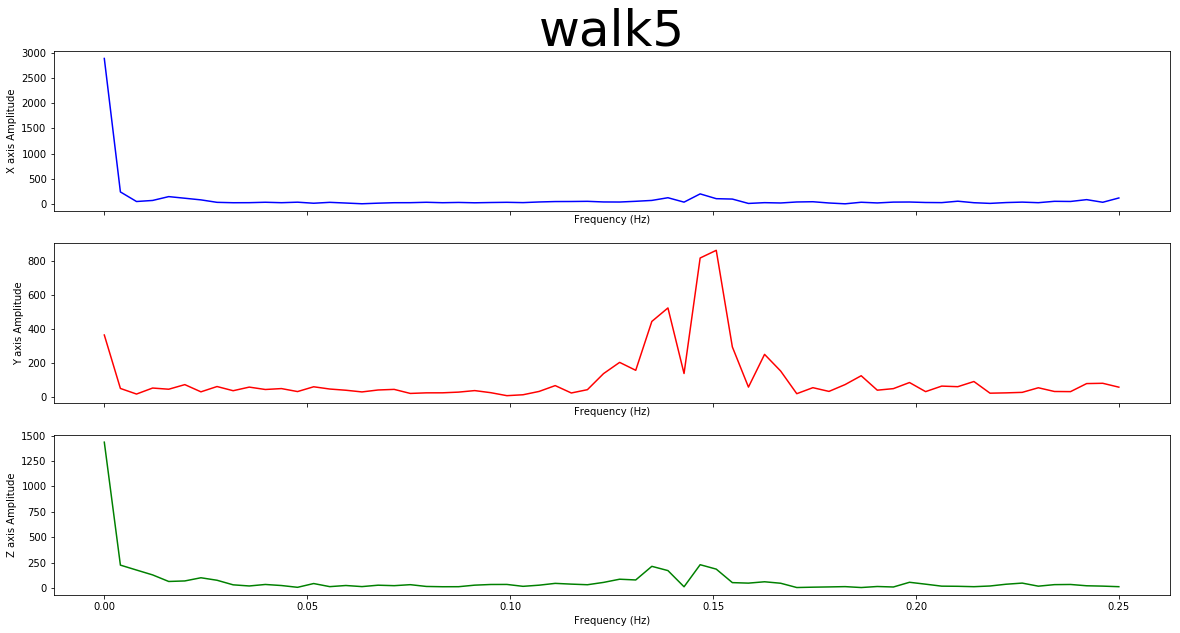

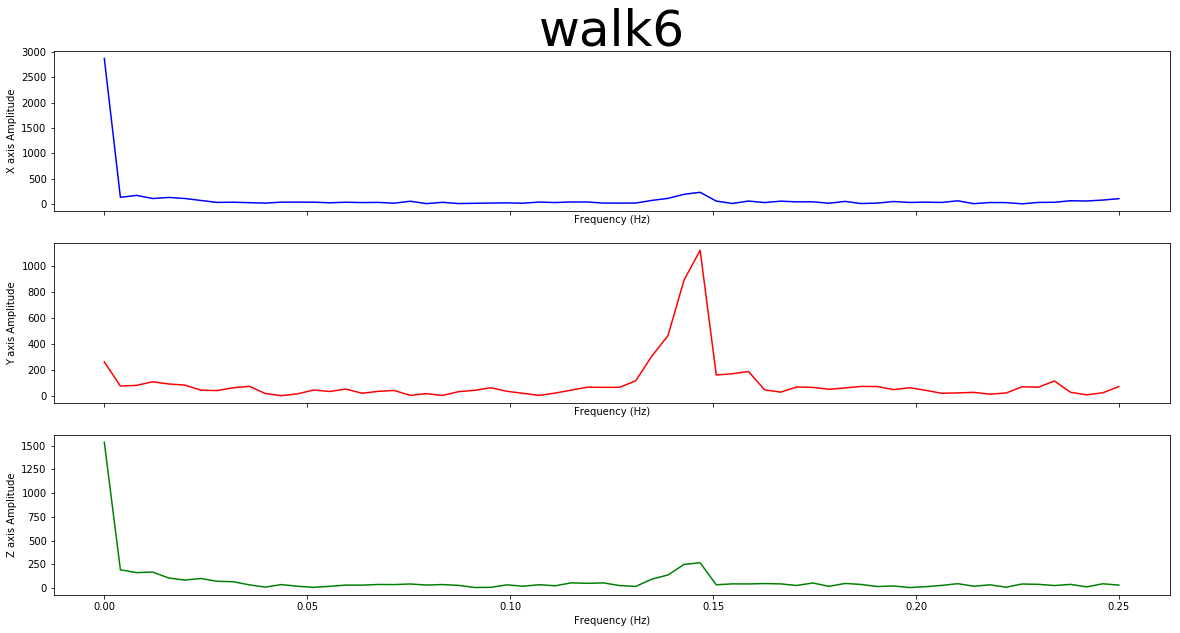

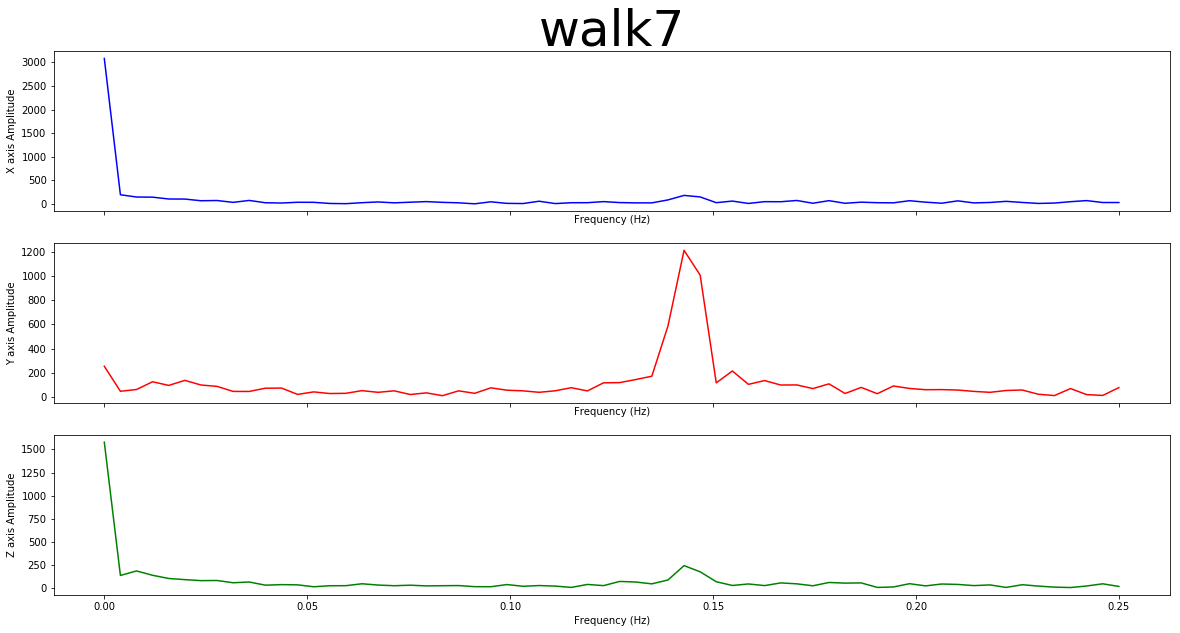

In [11]:
for i in range(WALK_TOTAL_SAMPLE):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    for j in range(3):
        fft_df = FFT(walk_df[i][TAGS[j]])
        ax[j].plot(fft_df['freq'], fft_df['spectrum'], color=COLORS[j])
        axis_name = TAGS[j].upper() + ' axis'
        ax[j].set_ylabel(axis_name + ' Amplitude')
        ax[j].set_xlabel('Frequency (Hz)')
        
    ax[0].set_title('walk' + str(i + 1), fontsize=50)
plt.show()

## walk state (MA)

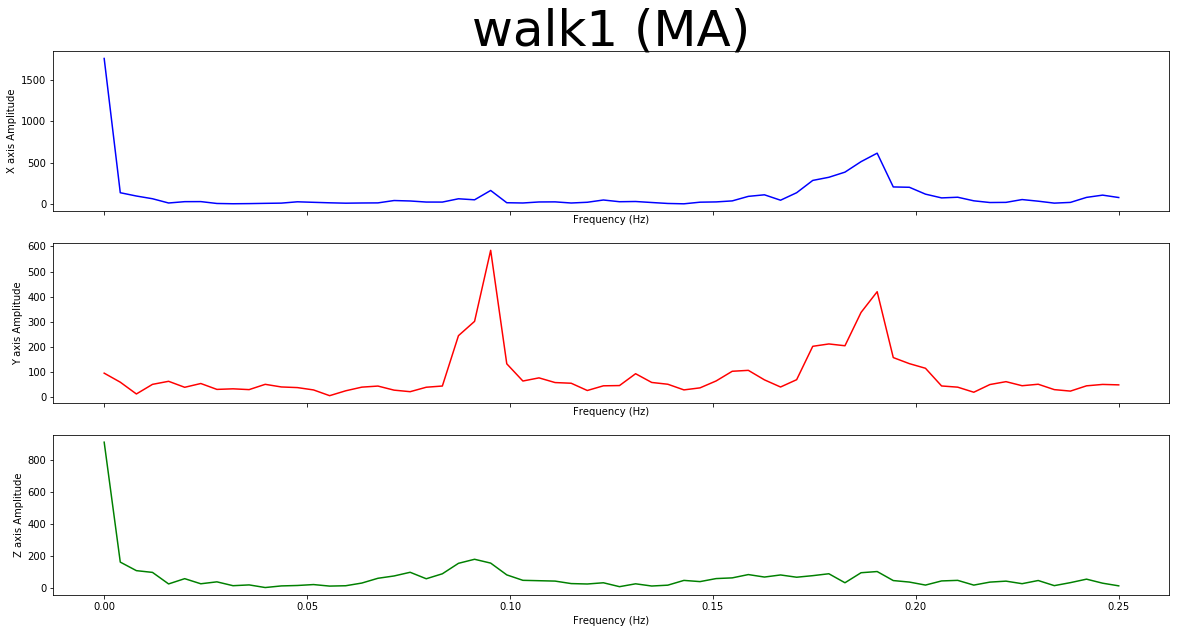

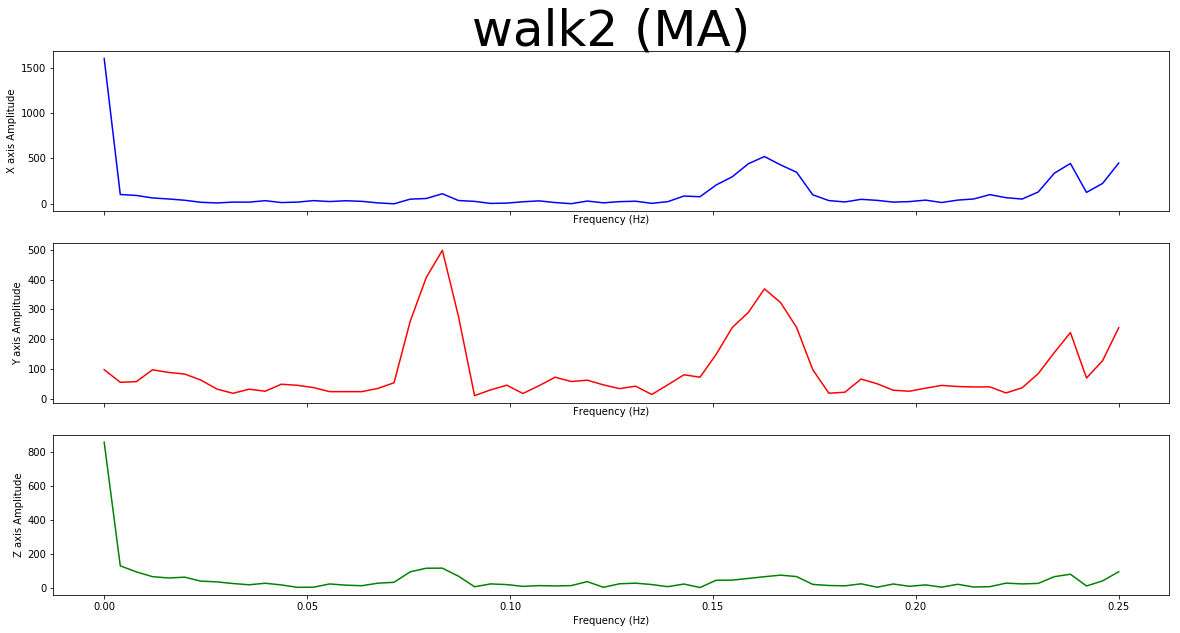

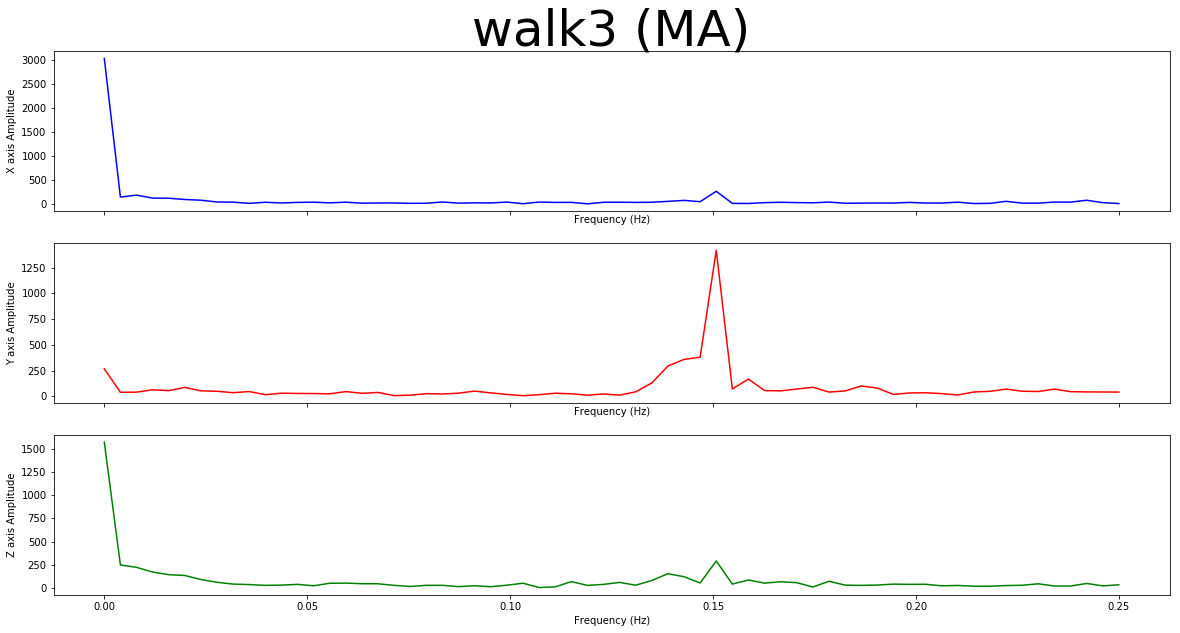

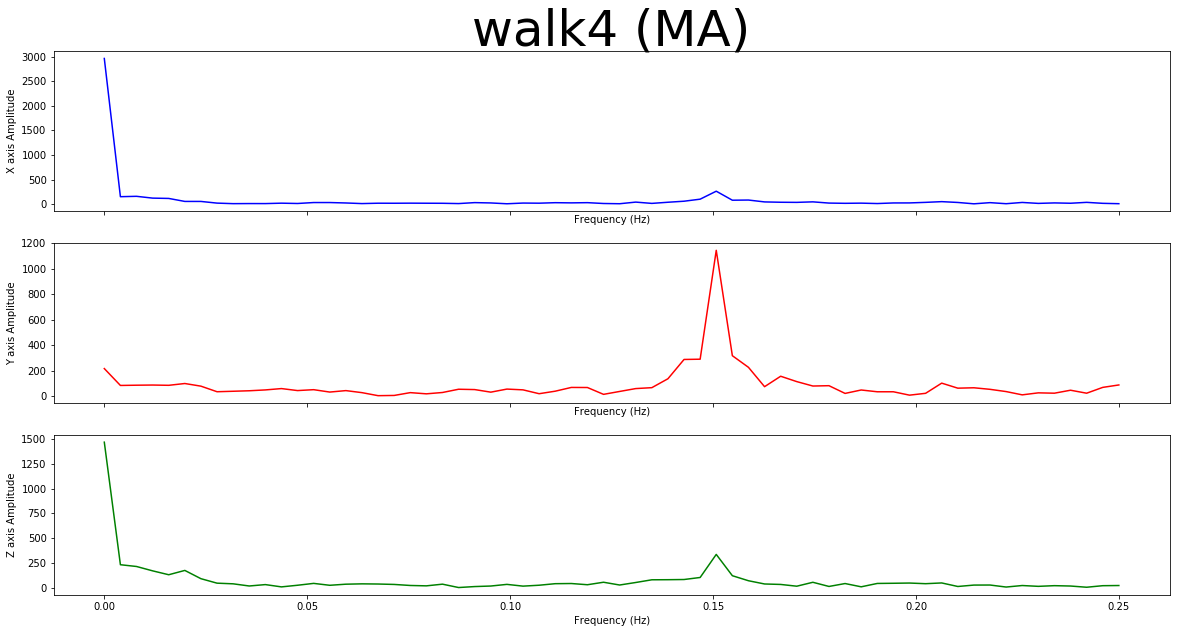

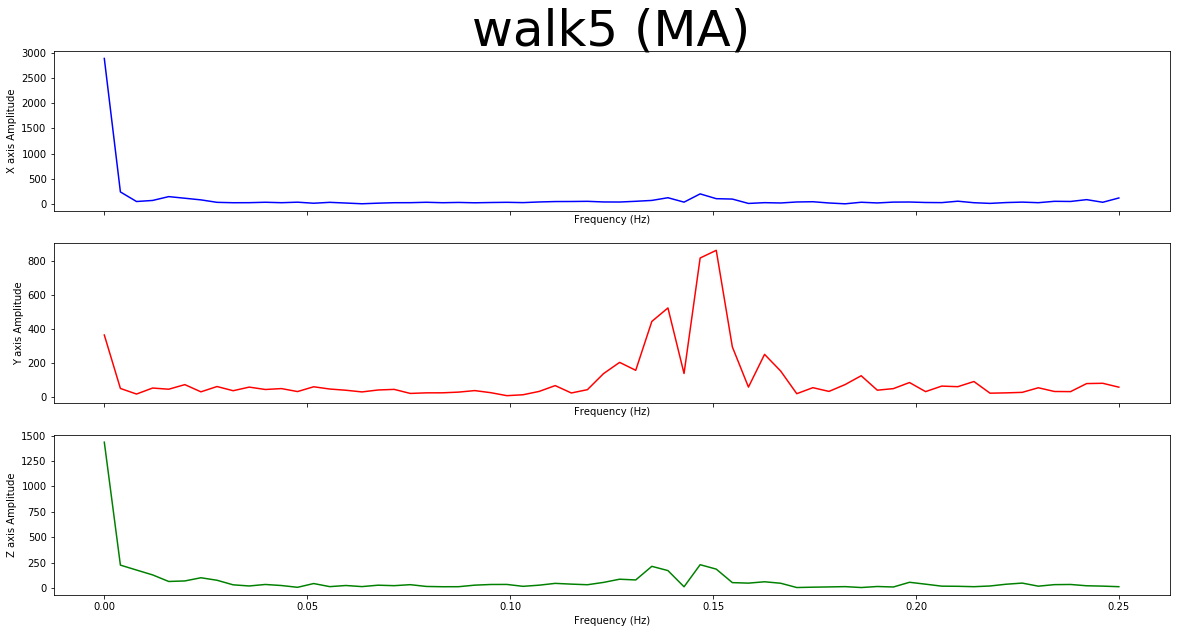

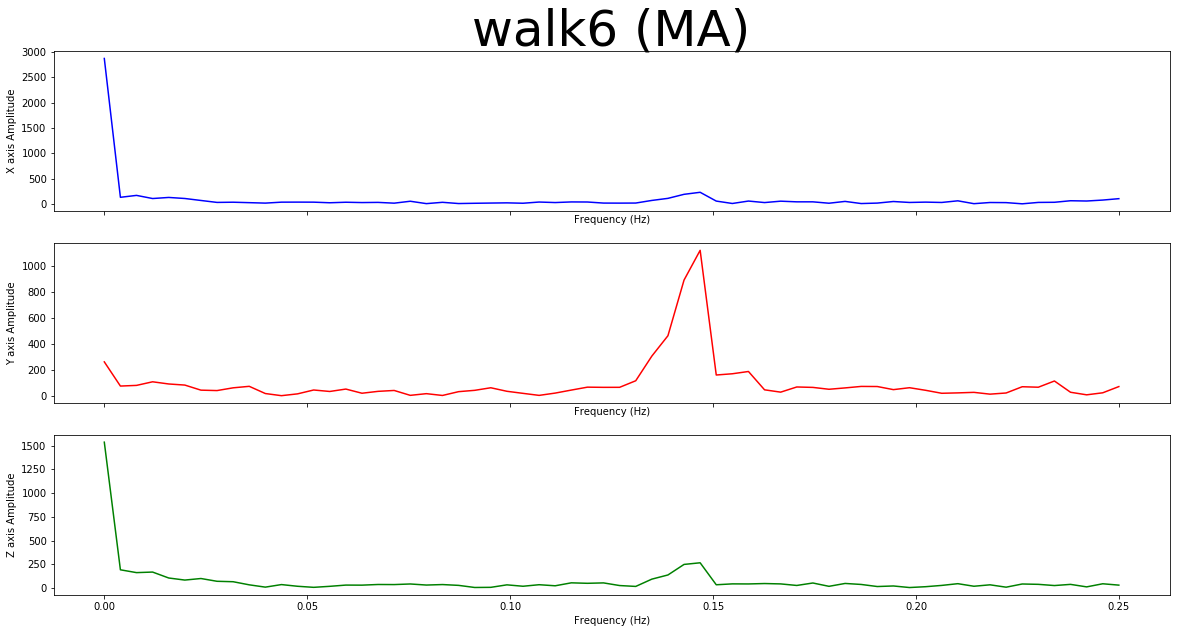

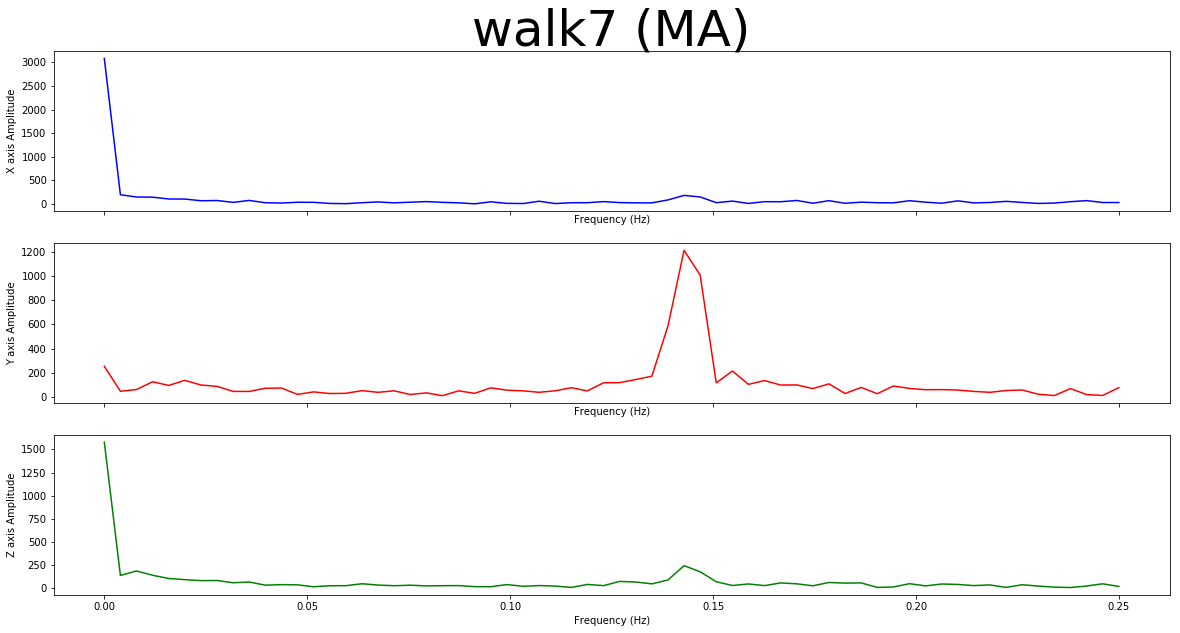

In [12]:
for i in range(WALK_TOTAL_SAMPLE):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    for j in range(3):
        df = walk_df[i][TAGS[j]].rolling(window=MA_WINDOW, center=True).mean()
        df.dropna(inplace=True)
        fft_df = FFT(walk_df[i][TAGS[j]])
        ax[j].plot(fft_df['freq'], fft_df['spectrum'], color=COLORS[j])
        axis_name = TAGS[j].upper() + ' axis'
        ax[j].set_ylabel(axis_name + ' Amplitude')
        ax[j].set_xlabel('Frequency (Hz)')
        
    ax[0].set_title('walk' + str(i + 1) + ' (MA)', fontsize=50)
plt.show()

# RMS

## run state

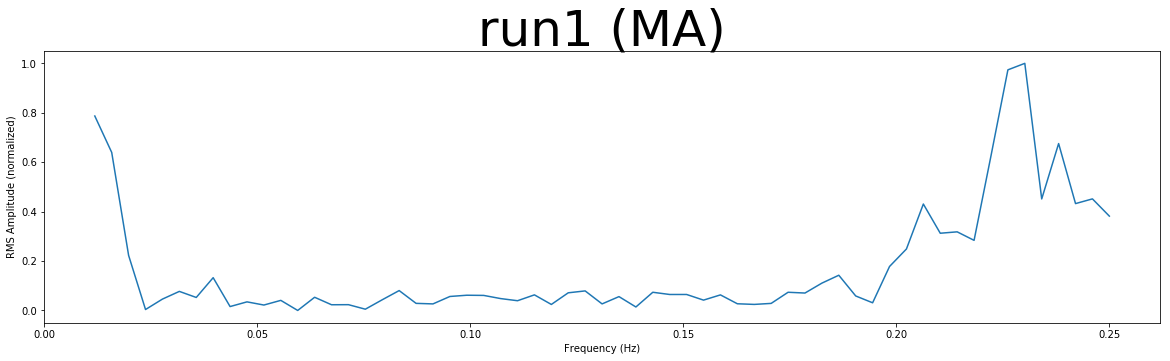

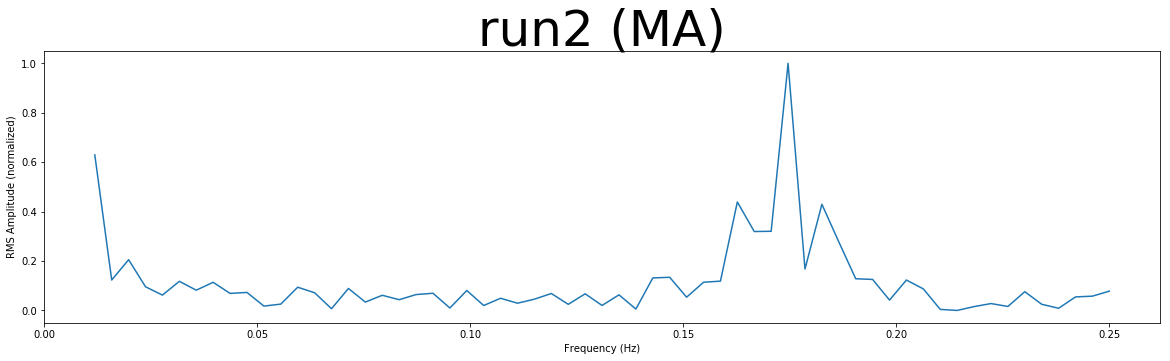

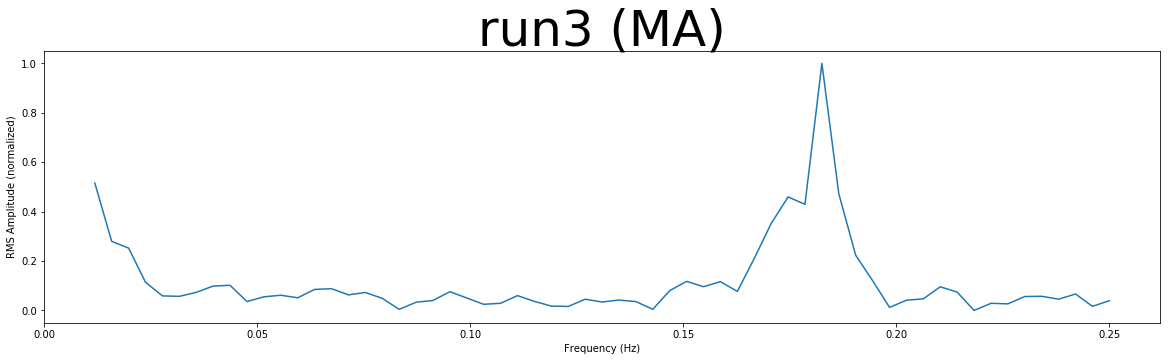

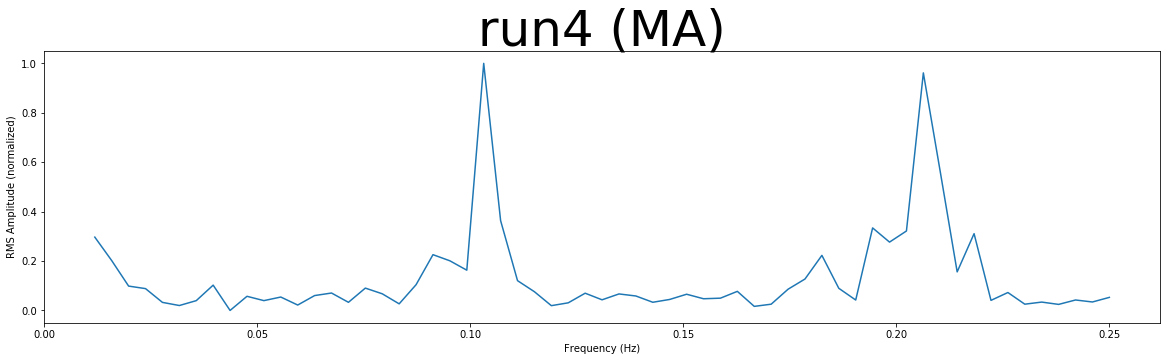

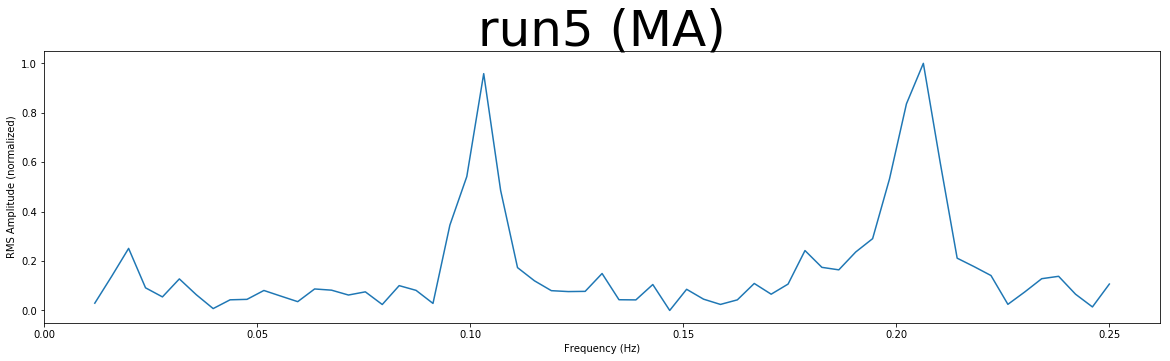

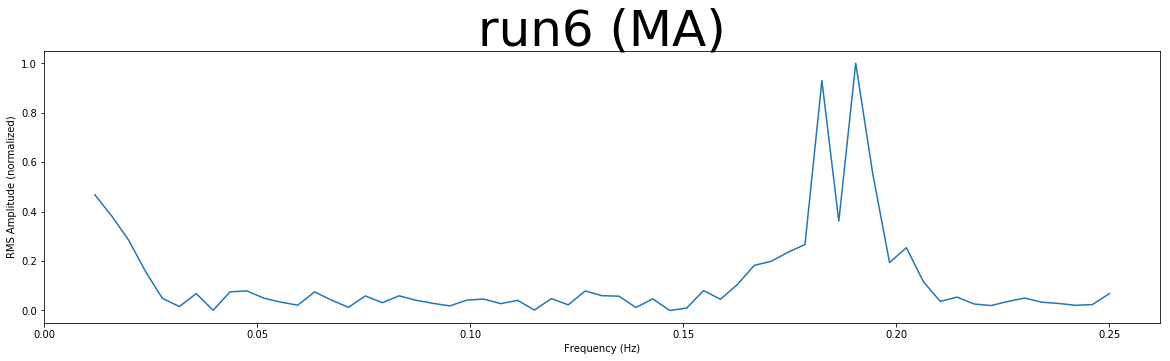

In [13]:
for i in range(RUN_TOTAL_SAMPLE):
    run_df[i]['rms'] = (
        run_df[i]['x'] * run_df[i]['x'] + run_df[i]['y'] * run_df[i]['y'] +
        run_df[i]['z'] * run_df[i]['z']).apply(lambda x: math.sqrt(x))
    df = run_df[i]['rms'].rolling(
        window=MA_WINDOW, center=True).mean().dropna()

    fft_df = FFT(df)
    fft_df = fft_df[fft_df['freq'] >= 0.01]
    fft_df['spectrum'] = (fft_df['spectrum'] - fft_df['spectrum'].min()) / (
        fft_df['spectrum'].max() - fft_df['spectrum'].min())

    plt.figure(figsize=(20, 5))
    plt.plot(fft_df['freq'], fft_df['spectrum'])
    plt.ylabel('RMS Amplitude (normalized)')
    plt.xlabel('Frequency (Hz)')
    plt.title('run' + str(i + 1) + ' (MA)', fontsize=50)
plt.show()

## walk state

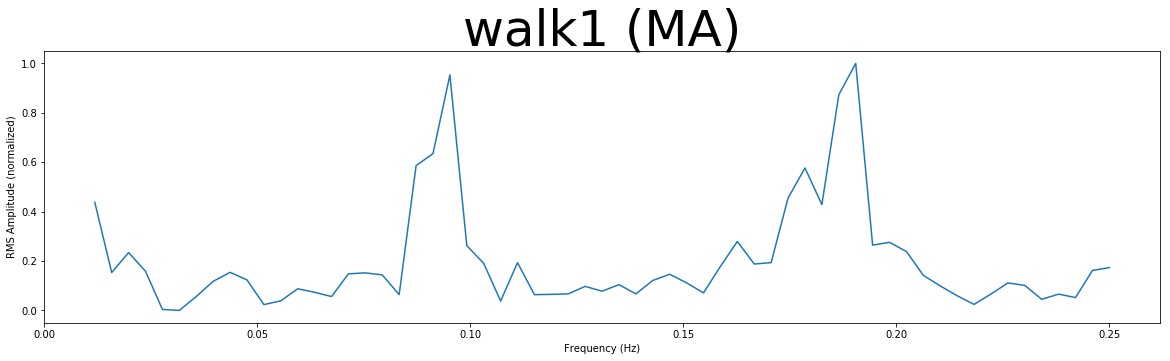

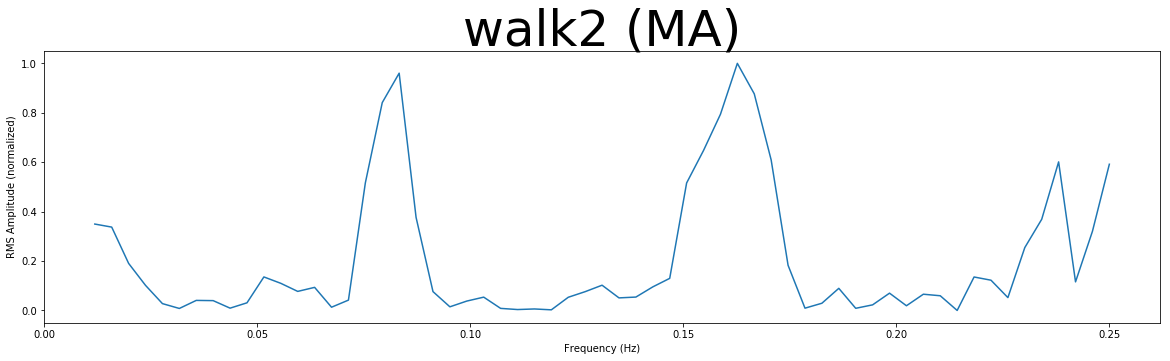

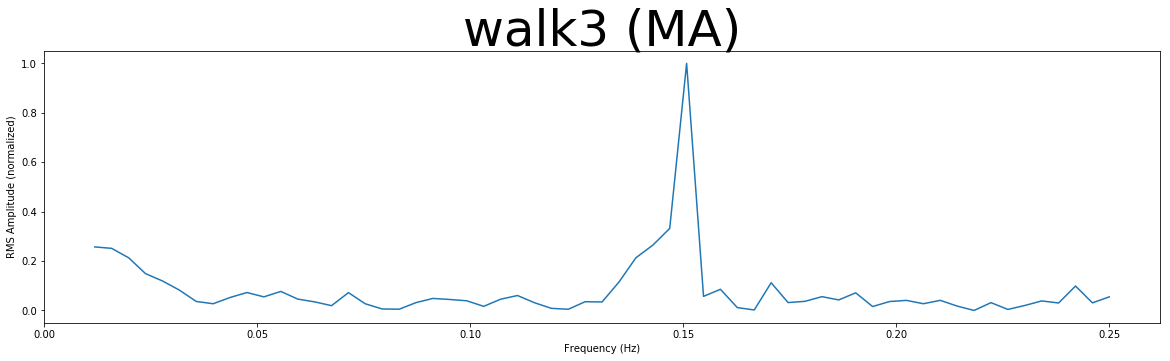

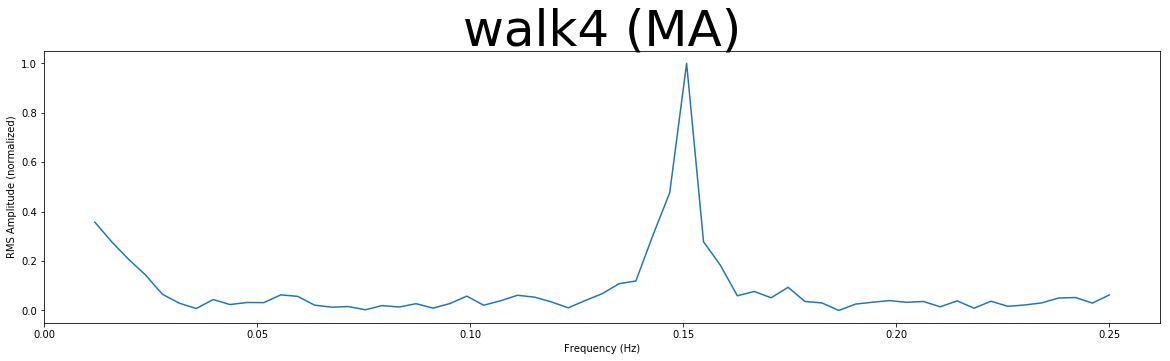

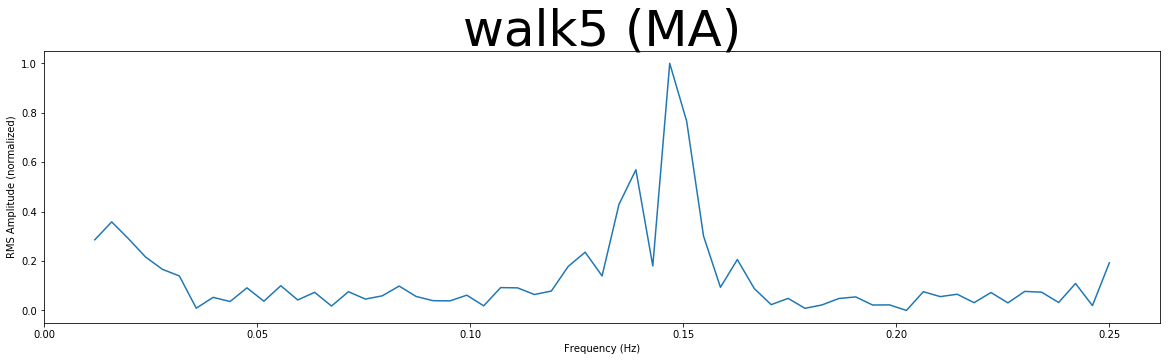

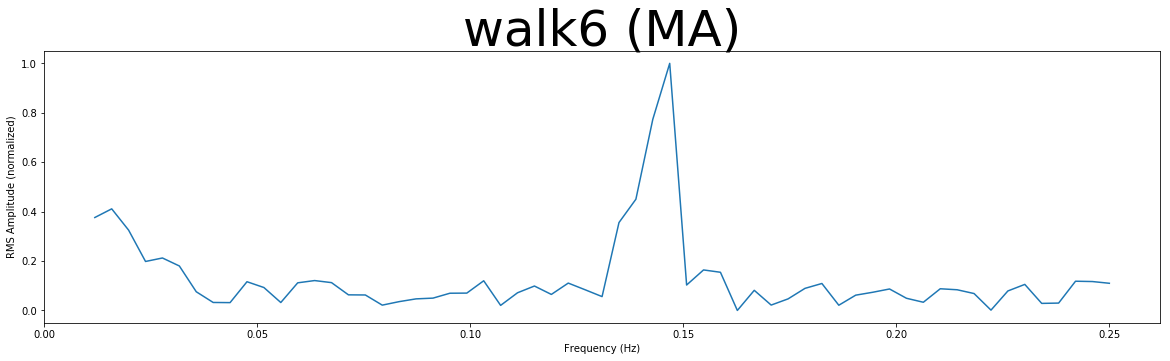

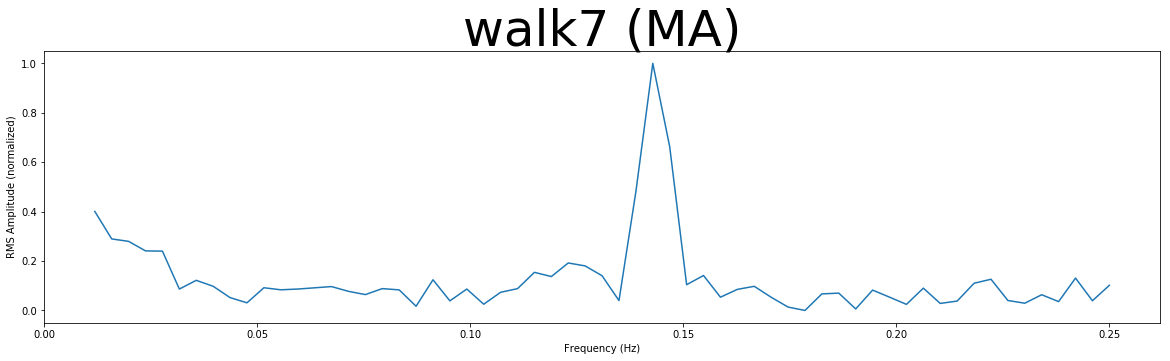

In [14]:
for i in range(WALK_TOTAL_SAMPLE):
    walk_df[i]['rms'] = (
        walk_df[i]['x'] * walk_df[i]['x'] + walk_df[i]['y'] * walk_df[i]['y'] +
        walk_df[i]['z'] * walk_df[i]['z']).apply(lambda x: math.sqrt(x))
    df = walk_df[i]['rms'].rolling(
        window=MA_WINDOW, center=True).mean().dropna()

    fft_df = FFT(df)
    fft_df = fft_df[fft_df['freq'] >= 0.01]
    fft_df['spectrum'] = (fft_df['spectrum'] - fft_df['spectrum'].min()) / (
        fft_df['spectrum'].max() - fft_df['spectrum'].min())

    plt.figure(figsize=(20, 5))
    plt.plot(fft_df['freq'], fft_df['spectrum'])
    plt.ylabel('RMS Amplitude (normalized)')
    plt.xlabel('Frequency (Hz)')
    plt.title('walk' + str(i + 1) + ' (MA)', fontsize=50)
plt.show()